# Data Science Mini-Project

Main Dataset: **"State Data"** by *The COVID TRACKING Project* <br>
Source: https://covidtracking.com/data/download

Dataset from Kaggle: **"US Counties: COVID19 + Weather + Socio/Health data"** by *John Davis* <br>
Source: https://www.kaggle.com/johnjdavisiv/us-counties-covid19-weather-sociohealth-data


### <u>Problem:<u>
## <font color='crimson'>What environmental factors affect the number of deaths due to COVID-19 and to what degree?</font> 

## <u> <font color='salmon'>Table of Contents</font> <u>
  
### <br> 1. Data Extraction <br>
    
     I. Importing Datasets

     II. COVID State Data Description

     III. Kaggle Data Description

     IV. COVID State Data Type & Info

     V. Kaggle Data Type & Info
    
### <br> 2. Data Cleaning <br>
    
     I. Sorting COVID State Data by State (A-Z) & Date (Ascending)

     II. Changing header to match the different datasets

     III. Merging COVID State Data with Statecode information

     IV. Kaggle Data Cleaning (Headers)

     V. Sorting Kaggle Data by State (A-Z) & Date (Ascending)

     VI. Functions to find average of all County Data (Average State Data = Sum of County Data / No of Counties)

     VII. Dictionary of all variables

     VIII. Creating a new dataframe containing all variables used in this analysis

     IX. Merged dataset with environmental factors and COVID
     
    
### <br> 3. Exploratory Data Analysis <br>
    
     I. Bi-Variate Statistics
    
     II. Temperature vs PositiveIncrease
    
     III. Temperature vs deathIncrease
    
     IV. Using Log Transformation on Temperature vs deathIncrease
    
     V. Dewpoint vs positiveIncrease
    
     VI. Dewpoint vs deathIncrease
    
     VII. Using Log Transformation on Dewpoint vs deathIncrease
    
     VIII. Precipitation vs positiveIncrease
    
     IX. Precipitation vs deathIncrease
    
     X. Using Log Transformation on Precipitation vs deathIncrease
    
     XI. WindSpeed vs positiveIncrease
    
     XII. WindSpeed vs deathIncrease
    
     XIII. Using Log Transformation on WindSpeed vs deathIncrease
    
     XIV. WindGust vs positiveIncrease
    
     XV. WindGust vs deathIncrease
    
     XVI. Using Log Transformation on WindGust vs deathIncrease
    
     XVII. Multi-Variate Statistics

### <br> 4. Machine Learning <br>
     I. Uni-Variate Linear Regression
    
     II. Multi-Variate Linear Regression
    
     III. Ordinary Regression
    
     IV. Using Log Transformation on Regression
    
     V. Polynomial Regression 
    
 ### <br> 5. Evaluation <br>

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

## <font color='Indigo'>Data Extraction</font> 

In [1]:
#Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics

### <font color='navy'>Importing Datasets</font> 

In [2]:
covidtracking_df = pd.read_csv('all-states-history.csv')
kaggle_df = pd.read_csv('US_counties_COVID19_health_weather_data.csv')
statecode_html = pd.read_html('https://www.nrcs.usda.gov/wps/portal/nrcs/detail/?cid=nrcs143_013696')

### <font color='navy'>COVID State Data Description</font>

In [3]:
covidtracking_df.head(15)

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,...,2736442.0,3380,NaN,NaN,NaN,481311.0,NaN,0,2736442.0,3380
3,2021-03-07,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-03-07,AZ,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,...,7908105.0,45110,580569.0,NaN,444089.0,NaN,3842945.0,14856,7908105.0,45110
5,2021-03-07,CA,54124.0,NaN,258,NaN,NaN,NaN,4291.0,0,...,49646014.0,133186,NaN,NaN,NaN,NaN,NaN,0,49646014.0,133186
6,2021-03-07,CO,5989.0,5251.0,3,735.0,23904.0,23904.0,326.0,18,...,6415123.0,38163,435053.0,NaN,NaN,NaN,2616541.0,6107,NaN,0
7,2021-03-07,CT,7704.0,6327.0,0,1377.0,12257.0,12257.0,428.0,0,...,6520366.0,0,NaN,396680.0,NaN,NaN,NaN,0,6520366.0,0
8,2021-03-07,DC,1030.0,NaN,0,NaN,NaN,NaN,150.0,0,...,1261363.0,5726,NaN,NaN,NaN,NaN,441942.0,1149,NaN,0
9,2021-03-07,DE,1473.0,1337.0,9,136.0,NaN,NaN,104.0,0,...,1431942.0,5867,NaN,NaN,NaN,NaN,633424.0,1132,NaN,0


### <font color='navy'>Kaggle Data Description</font>

In [4]:
kaggle_df.head(10)

,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,...,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg,date_stay_at_home_announced,date_stay_at_home_effective
0,2020-01-21,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,38.266667,38.92,38.44,36.146667,40.333333,41.64,40.74,37.973333,2020-03-23,2020-03-23
1,2020-01-22,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,39.233333,41.12,39.76,37.613333,42.633333,42.98,41.68,39.440000,2020-03-23,2020-03-23
2,2020-01-23,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,42.900000,41.74,41.15,38.226667,44.733333,43.72,42.47,40.120000,2020-03-23,2020-03-23
3,2020-01-24,Cook,Illinois,17031,1,0.0,no,no,41.840039,-87.816716,...,32.366667,30.02,27.43,24.886667,31.433333,28.50,25.00,22.693333,2020-03-20,2020-03-21
4,2020-01-24,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,44.600000,42.54,41.75,38.226667,46.000000,44.30,42.88,41.293333,2020-03-23,2020-03-23
5,2020-01-25,Orange,California,06059,1,0.0,no,no,33.702979,-117.761091,...,51.700000,51.02,51.10,49.786667,51.333333,50.14,47.18,45.513333,2020-03-19,2020-03-19
6,2020-01-25,Cook,Illinois,17031,1,0.0,no,no,41.840039,-87.816716,...,32.000000,30.80,28.81,25.953333,32.233333,29.98,25.96,24.000000,2020-03-20,2020-03-21
7,2020-01-25,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,44.000000,43.38,40.78,39.166667,44.633333,44.28,42.55,42.280000,2020-03-23,2020-03-23
8,2020-01-26,Maricopa,Arizona,04013,1,0.0,no,no,33.348813,-112.491306,...,47.000000,46.76,46.04,46.760000,42.833333,39.94,38.72,37.553333,2020-03-30,2020-03-31
9,2020-01-26,Los Angeles,California,06037,1,0.0,no,no,34.358922,-118.217049,...,57.800000,56.84,58.10,57.200000,39.933333,36.46,32.72,33.020000,2020-03-19,2020-03-19


### <font color='navy'>COVID State Data Type & Info</font>

In [5]:
print("covidtracking data type : ", type(covidtracking_df))
print("covidtracking data dims : ", covidtracking_df.shape)
print()
covidtracking_df.info()

covidtracking data type :  <class 'pandas.core.frame.DataFrame'>
covidtracking data dims :  (20780, 41)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              20780 non-null  object 
 1   state                             20780 non-null  object 
 2   death                             19909 non-null  float64
 3   deathConfirmed                    9464 non-null   float64
 4   deathIncrease                     20780 non-null  int64  
 5   deathProbable                     7573 non-null   float64
 6   hospitalized                      12891 non-null  float64
 7   hospitalizedCumulative            12891 non-null  float64
 8   hospitalizedCurrently             17338 non-null  float64
 9   hospitalizedIncrease              20780 non-null  int64  
 10  inIcuCumulative          

### <font color='navy'>Kaggle Data Type & Info</font>

In [6]:
print("Kaggle data type : ", type(kaggle_df))
print("Kaggle data dims : ", kaggle_df.shape)
print()
kaggle_df.info()

Kaggle data type :  <class 'pandas.core.frame.DataFrame'>
Kaggle data dims :  (790331, 227)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790331 entries, 0 to 790330
Columns: 227 entries, date to date_stay_at_home_effective
dtypes: float64(214), int64(1), object(12)
memory usage: 1.3+ GB


## <font color='Indigo'>Data Cleaning</font> 

### <font color='navy'>Sorting COVID State Data by State (A-Z) & Date (Ascending)</font>

In [7]:
covidtracking_df.sort_values(by=['state','date'])

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
20451,2020-03-06,AK,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,8.0,0,NaN,NaN,NaN,NaN,NaN,0,8.0,8
20400,2020-03-07,AK,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,12.0,4,NaN,NaN,NaN,NaN,NaN,0,12.0,4
20349,2020-03-08,AK,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,14.0,2,NaN,NaN,NaN,NaN,NaN,0,14.0,2
20298,2020-03-09,AK,0.0,NaN,0,NaN,1.0,1.0,NaN,1,...,23.0,9,NaN,NaN,NaN,NaN,NaN,0,23.0,9
20247,2020-03-10,AK,0.0,NaN,0,NaN,1.0,1.0,NaN,0,...,23.0,0,NaN,NaN,NaN,NaN,NaN,0,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,2021-03-03,WY,682.0,NaN,0,NaN,1388.0,1388.0,24.0,3,...,643476.0,2096,NaN,NaN,NaN,NaN,227949.0,356,643476.0,2096
223,2021-03-04,WY,682.0,NaN,0,NaN,1389.0,1389.0,23.0,1,...,646179.0,2703,NaN,NaN,NaN,NaN,228285.0,336,646179.0,2703
167,2021-03-05,WY,682.0,NaN,0,NaN,1391.0,1391.0,21.0,2,...,649293.0,3114,NaN,NaN,NaN,NaN,228661.0,376,649293.0,3114
111,2021-03-06,WY,682.0,NaN,0,NaN,1391.0,1391.0,21.0,0,...,649293.0,0,NaN,NaN,NaN,NaN,228661.0,0,649293.0,0


### <font color='navy'>Changing header to match the different datasets</font>

In [8]:
new_header = ['Name','state','FIPS']
statecode_html[1].to_csv('code.csv', index = False, header = new_header)

In [9]:
df1 = pd.read_csv('code.csv')
df2 = df1.drop(columns='FIPS')
df2.head(15)

,Name,state
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,Florida,FL
9,Georgia,GA


### <font color='navy'>Merging COVID State Data with Statecode information</font>

In [10]:
covidtracking_state_df = pd.merge(covidtracking_df, df2, on ='state', how ='inner')
covidtracking_state_df

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,Name
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0,Alaska
1,2021-03-06,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0,Alaska
2,2021-03-05,AK,305.0,NaN,2,NaN,1293.0,1293.0,33.0,3,...,7144,NaN,NaN,NaN,NaN,NaN,0,1731628.0,7144,Alaska
3,2021-03-04,AK,303.0,NaN,0,NaN,1290.0,1290.0,32.0,5,...,13466,NaN,NaN,NaN,NaN,NaN,0,1724484.0,13466,Alaska
4,2021-03-03,AK,303.0,NaN,1,NaN,1285.0,1285.0,26.0,-1,...,6358,NaN,NaN,NaN,NaN,NaN,0,1711018.0,6358,Alaska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20407,2020-03-05,WY,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,4,NaN,NaN,NaN,NaN,NaN,0,8.0,4,Wyoming
20408,2020-03-04,WY,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,3,NaN,NaN,NaN,NaN,NaN,0,4.0,3,Wyoming
20409,2020-03-03,WY,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,0,1.0,0,Wyoming
20410,2020-03-02,WY,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,0,1.0,0,Wyoming


### <font color='navy'>Kaggle Data Cleaning (Headers)</font>

In [11]:
kag_df = (kaggle_df[['date', 'county','state','mean_temp','dewpoint','precipitation','population_density_per_sqmi','wind_speed','wind_gust']])

kag_df 

,date,county,state,mean_temp,dewpoint,precipitation,population_density_per_sqmi,wind_speed,wind_gust
0,2020-01-21,Snohomish,Washington,44.1,40.3,0.00,363.586159,8.3,28.0
1,2020-01-22,Snohomish,Washington,44.8,40.3,0.29,363.586159,13.2,26.0
2,2020-01-23,Snohomish,Washington,49.9,47.3,0.54,363.586159,12.0,26.0
3,2020-01-24,Cook,Illinois,36.1,34.7,0.16,5531.878539,4.8,NaN
4,2020-01-24,Snohomish,Washington,51.5,46.6,0.32,363.586159,13.0,28.0
...,...,...,...,...,...,...,...,...,...
790326,2020-12-04,Sweetwater,Wyoming,21.1,3.2,0.00,4.297803,5.2,NaN
790327,2020-12-04,Teton,Wyoming,2.4,NaN,0.00,5.661502,NaN,NaN
790328,2020-12-04,Uinta,Wyoming,25.2,4.0,0.00,10.035892,3.7,NaN
790329,2020-12-04,Washakie,Wyoming,17.9,7.6,0.00,3.730539,1.7,NaN


In [12]:
kag_df_attrbutes = (kaggle_df[['date','state','fog','rain','snow','tornado','hail','thunder']])

kag_df_attrbutes.head(50000)

,date,state,fog,rain,snow,tornado,hail,thunder
0,2020-01-21,Washington,0.0,1.0,0.0,0.0,0.0,0.0
1,2020-01-22,Washington,0.0,1.0,0.0,0.0,0.0,0.0
2,2020-01-23,Washington,0.0,1.0,0.0,0.0,0.0,0.0
3,2020-01-24,Illinois,1.0,1.0,1.0,0.0,0.0,0.0
4,2020-01-24,Washington,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
49995,2020-04-11,Texas,0.0,0.0,0.0,0.0,0.0,0.0
49996,2020-04-11,Texas,0.0,0.0,0.0,0.0,0.0,0.0
49997,2020-04-11,Texas,0.0,1.0,0.0,0.0,0.0,0.0
49998,2020-04-11,Texas,0.0,0.0,0.0,0.0,0.0,0.0


### <font color='navy'>Sorting Kaggle Data by State (A-Z) & Date (Ascending)</font>

In [13]:
kaggle_sort = kag_df.sort_values(by=['state','date'], na_position='first')

In [14]:
kaggle_sort.dropna()
print(kaggle_sort.head(10))

            date      county    state  mean_temp  dewpoint  precipitation  \
1606  2020-03-13      Elmore  Alabama       70.2      61.7           0.00   
1607  2020-03-13   Jefferson  Alabama       67.3      60.1           0.00   
1608  2020-03-13   Limestone  Alabama       63.5      55.1           0.13   
1609  2020-03-13  Montgomery  Alabama       71.5      60.7           0.00   
1610  2020-03-13  Tuscaloosa  Alabama       69.4       NaN           0.00   
1918  2020-03-14     Baldwin  Alabama       63.5       NaN           0.00   
1919  2020-03-14      Elmore  Alabama       68.3      61.7           0.00   
1920  2020-03-14   Jefferson  Alabama       65.7      55.8           0.23   
1921  2020-03-14   Limestone  Alabama       57.0      45.6           0.01   
1922  2020-03-14  Montgomery  Alabama       69.9      61.4           0.00   

      population_density_per_sqmi  wind_speed  wind_gust  
1606                   130.895078         4.9        NaN  
1607                   593.091933 

### <font color='navy'>Functions to find average of all County Data (Average State Data = Sum of County Data / No of Counties)</font>

In [15]:
from decimal import Decimal
import math

class MeanObj:
  total = 0
  count = 0
  has_neg = False
  
  @property
  def average(self):
    return self.total/self.count
  
  def addValue(self, value):    
    try:
      value = float(value)
      self.total += value if isinstance(value, float) and not math.isnan(value) else 0
      if not self.has_neg and value < 0:
        self.has_neg = True
    except ValueError:
      pass
    
    self.count += 1

  def __repr__(self):
    return f'MeanObj(total: {self.total}, count: {self.count}, avg: {self.average:.8f})'

### <font color='navy'>Dictionary of all variables</font>

In [16]:
someDict = dict()
for row in kag_df.itertuples():
  # print('row', row)
  date = str(row[1])
  state = str(row[3])
  # print('date', date)
  # Check if date exists in dict
  # Initialize if not exists
  if someDict.get(date, None) is None: someDict[date] = {}
  if someDict[date].get(state, None) is None:
    someDict[date][state] = {
      'mean_temp': MeanObj(),
      'dewpoint': MeanObj(),
      'precipitation': MeanObj(),
      'population_density_per_sqmi': MeanObj(),
      'wind_speed': MeanObj(),
      'wind_gust': MeanObj(),
    }
  # add value
  myDict = someDict[date][state]
  myDict['mean_temp'].addValue(row[4])
  myDict['dewpoint'].addValue(row[5])
  myDict['precipitation'].addValue(row[6])
  myDict['wind_speed'].addValue(row[7])
  myDict['wind_gust'].addValue(row[8])

  # if myDict['mean_temp'].has_neg:
  #   print('debug', date, state, myDict['mean_temp'])
  

# print(someDict)

### <font color='navy'>Creating a new dataframe containing all variables used in this analysis</font>

In [17]:
new_df = pd.DataFrame(columns=['date', 'Name', 'meanDewpoint', 'meanTemperature', 'meanPrecipitation','meanWindSpeed','meanWindGust'])
i = 0
for date, states_data in someDict.items():
  for state, data in states_data.items():
    payload = [date, state, data['dewpoint'].average, data['mean_temp'].average, data['precipitation'].average, data['wind_speed'].average, data['wind_gust'].average]
    new_df.loc[i] = payload
    # if data['mean_temp'].average < 0:
    #   print('neg mean temp', date, state, data['mean_temp'].average)
    i += 1

new_df

,date,Name,meanDewpoint,meanTemperature,meanPrecipitation,meanWindSpeed,meanWindGust
0,2020-01-21,Washington,40.300000,44.100000,0.00,363.586159,8.300000
1,2020-01-22,Washington,40.300000,44.800000,0.29,363.586159,13.200000
2,2020-01-23,Washington,47.300000,49.900000,0.54,363.586159,12.000000
3,2020-01-24,Illinois,34.700000,36.100000,0.16,5531.878539,4.800000
4,2020-01-24,Washington,46.600000,51.500000,0.32,363.586159,13.000000
...,...,...,...,...,...,...,...
14771,2020-12-04,Virginia,22.164662,37.652632,0.00,882.573690,2.541353
14772,2020-12-04,Washington,24.682051,31.874359,0.00,137.073962,1.784615
14773,2020-12-04,West Virginia,22.354545,37.576364,0.00,96.949687,1.947273
14774,2020-12-04,Wisconsin,23.045833,33.486111,0.00,166.314674,6.970833


### <font color='navy'>Merged dataset with environmental factors and COVID</font> 

In [18]:
first_merge = pd.merge(covidtracking_state_df, 
                      new_df, 
                      on =['date','Name'], 
                      how ='inner')

all_merge = pd.merge(first_merge, 
                      kag_df_attrbutes, 
                      on =['date','state'],  
                      how ='left')
all_merge



,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,meanTemperature,meanPrecipitation,meanWindSpeed,meanWindGust,fog,rain,snow,tornado,hail,thunder
0,2020-12-04,AK,142.0,142.0,12,NaN,794.0,794.0,151.0,11,...,0.000000,0.000000,8.507418,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-03,AK,130.0,130.0,8,NaN,783.0,783.0,157.0,15,...,0.000000,0.000000,8.507418,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-02,AK,122.0,122.0,0,NaN,768.0,768.0,164.0,19,...,0.000000,0.000000,8.507418,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-01,AK,122.0,122.0,1,NaN,749.0,749.0,155.0,24,...,1.425926,0.000000,8.507418,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-11-30,AK,121.0,121.0,0,NaN,725.0,725.0,162.0,3,...,18.640741,0.050741,8.507418,4.362963,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14311,2020-03-15,WY,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,31.600000,0.000000,8.144320,8.950000,NaN,NaN,NaN,NaN,NaN,NaN
14312,2020-03-14,WY,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,31.050000,0.010000,8.144320,7.800000,NaN,NaN,NaN,NaN,NaN,NaN
14313,2020-03-13,WY,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,27.150000,0.050000,8.144320,6.850000,NaN,NaN,NaN,NaN,NaN,NaN
14314,2020-03-12,WY,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,34.000000,0.210000,11.858791,11.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
all_merge.shape

(14316, 53)

In [20]:
all_merge.describe()

,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,...,meanTemperature,meanPrecipitation,meanWindSpeed,meanWindGust,fog,rain,snow,tornado,hail,thunder
count,13742.000000,6674.000000,14316.000000,5027.000000,9349.000000,9349.000000,11954.000000,14316.000000,2676.000000,7251.000000,...,14316.000000,14316.000000,14316.000000,14316.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,2641.677121,2695.160024,18.822925,249.390093,8105.538025,8105.538025,966.091016,40.516834,1356.700299,317.725555,...,57.235802,0.068267,359.826445,5.324972,NaN,NaN,NaN,NaN,NaN,NaN
std,4573.828140,3108.432623,44.776767,376.185135,15201.743418,15201.743418,1599.296304,240.369230,1313.011959,510.520235,...,18.961113,0.149825,862.686343,2.731863,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,-201.000000,0.000000,1.000000,1.000000,0.000000,-4124.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,130.250000,438.250000,1.000000,41.000000,674.000000,674.000000,151.000000,0.000000,360.750000,67.000000,...,47.323571,0.000000,55.537892,3.520152,NaN,NaN,NaN,NaN,NaN,NaN
50%,757.000000,1705.500000,6.000000,146.000000,2984.000000,2984.000000,488.000000,1.500000,990.000000,158.000000,...,61.192318,0.008750,143.754660,5.080000,NaN,NaN,NaN,NaN,NaN,NaN
75%,3013.000000,3606.000000,19.000000,256.500000,9226.000000,9226.000000,1035.750000,35.000000,1836.750000,324.000000,...,71.683069,0.068604,356.472644,6.842702,NaN,NaN,NaN,NaN,NaN,NaN
max,27017.000000,15419.000000,951.000000,1836.000000,89995.000000,89995.000000,18825.000000,16373.000000,6642.000000,5225.000000,...,90.200000,2.136000,28069.675983,19.606000,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

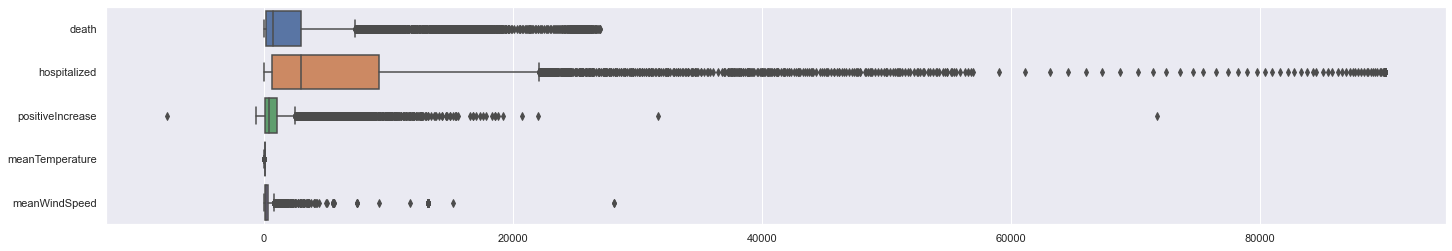

In [21]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = all_merge[['death', 'hospitalized','positiveIncrease','meanTemperature','meanWindSpeed']], orient = "h")

## <font color='Indigo'>Exploratory Data Analysis</font> 

### <font color='navy'>Bi-Variate Statistics</font>

In [22]:
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate PowerTransformer
pow_trans = PowerTransformer()

temperature = pd.DataFrame(all_merge['meanTemperature'])
dewpoint = pd.DataFrame(all_merge['meanDewpoint'])
precipitation = pd.DataFrame(all_merge['meanPrecipitation'])
windspeed = pd.DataFrame(all_merge['meanWindSpeed'])
windgust = pd.DataFrame(all_merge['meanWindGust'])
positivecase = pd.DataFrame(all_merge['positiveIncrease'])
deathincrease = pd.DataFrame(all_merge['deathIncrease'])

### <font color='navy'>Temperature vs PositiveIncrease</font>

In [23]:
# Create a joint dataframe by concatenating the two variables
tempcaseDF = pd.concat([temperature, positivecase], axis = 1).reindex(temperature.index)
tempcaseDF

,meanTemperature,positiveIncrease
0,0.000000,750
1,0.000000,760
2,0.000000,697
3,1.425926,511
4,18.640741,507
...,...,...
14311,31.600000,1
14312,31.050000,1
14313,27.150000,0
14314,34.000000,1


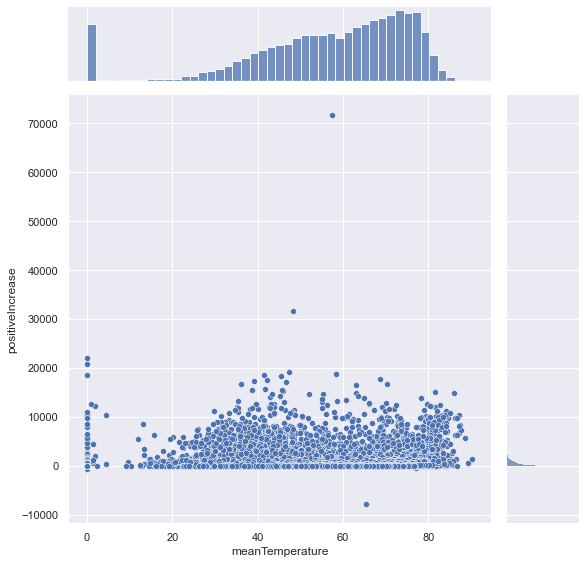

In [24]:
# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = tempcaseDF, x = "meanTemperature", y = "positiveIncrease", height = 8)

In [25]:
# Calculate the correlation between the two columns/variables
tempcaseDF.corr()

,meanTemperature,positiveIncrease
meanTemperature,1.00000,0.00207
positiveIncrease,0.00207,1.00000


<AxesSubplot:>

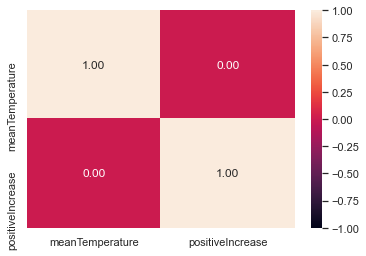

In [26]:
sb.heatmap(tempcaseDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### <font color='navy'>Temperature vs deathIncrease</font>

In [27]:
tempdeathDF = pd.concat([temperature, deathincrease], axis = 1).reindex(temperature.index)
tempdeathDF

,meanTemperature,deathIncrease
0,0.000000,12
1,0.000000,8
2,0.000000,0
3,1.425926,1
4,18.640741,0
...,...,...
14311,31.600000,0
14312,31.050000,0
14313,27.150000,0
14314,34.000000,0


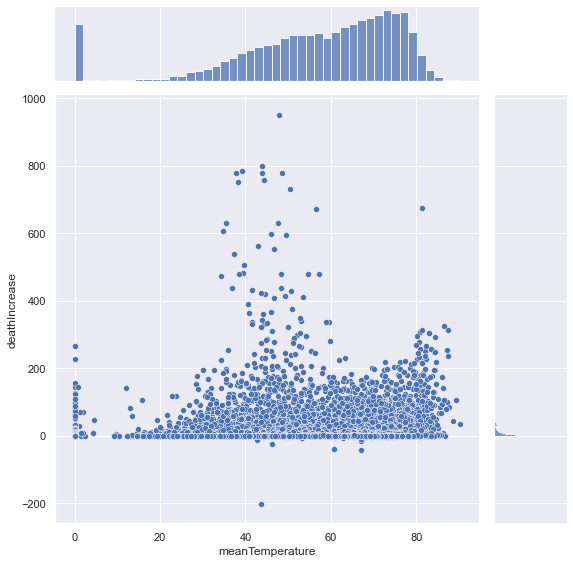

In [28]:
# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = tempdeathDF, x = "meanTemperature", y = "deathIncrease", height = 8)

In [29]:
# Calculate the correlation between the two columns/variables
tempdeathDF.corr()

,meanTemperature,deathIncrease
meanTemperature,1.000000,0.035357
deathIncrease,0.035357,1.000000


<AxesSubplot:>

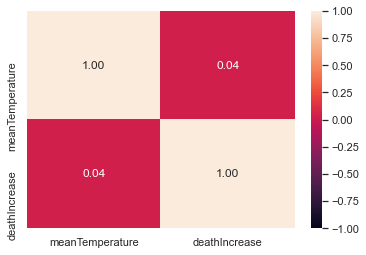

In [30]:
sb.heatmap(tempdeathDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### <font color='navy'>Using Log Transformation on Temperature vs deathIncrease</font>

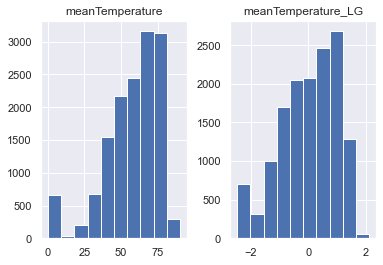

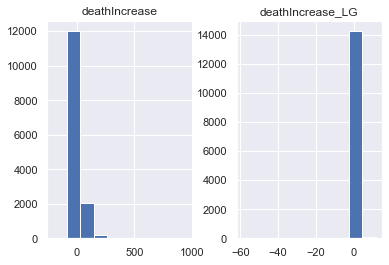

In [31]:
# Train the transform on the data
pow_trans.fit(tempdeathDF[['meanTemperature']])
 
# Apply the power transform to the data
tempdeathDF['meanTemperature_LG'] = pow_trans.transform(tempdeathDF[['meanTemperature']])
 
# Plot the data before and after the transformation
tempdeathDF[['meanTemperature', 'meanTemperature_LG']].hist()

# Train the transform on the data
pow_trans.fit(tempdeathDF[['deathIncrease']])
 
# Apply the power transform to the data
tempdeathDF['deathIncrease_LG'] = pow_trans.transform(tempdeathDF[['deathIncrease']])
 
# Plot the data before and after the transformation
tempdeathDF[['deathIncrease', 'deathIncrease_LG']].hist()

plt.show()

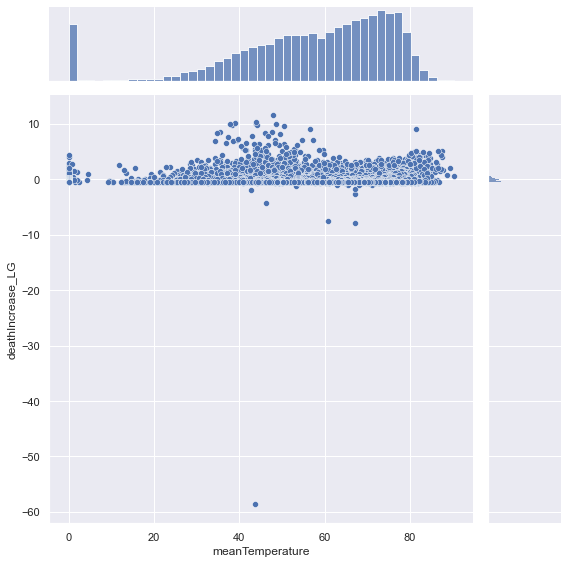

In [32]:
# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = tempdeathDF, x = "meanTemperature", y = "deathIncrease_LG", height = 8)

In [33]:
tempdeathDF.corr()

,meanTemperature,deathIncrease,meanTemperature_LG,deathIncrease_LG
meanTemperature,1.000000,0.035357,0.987160,0.068883
deathIncrease,0.035357,1.000000,0.029464,0.852298
meanTemperature_LG,0.987160,0.029464,1.000000,0.063778
deathIncrease_LG,0.068883,0.852298,0.063778,1.000000


### <font color='navy'>Dewpoint vs positiveIncrease</font>

In [34]:
dewcaseDF = pd.concat([dewpoint, positivecase], axis = 1).reindex(dewpoint.index)
dewcaseDF

,meanDewpoint,positiveIncrease
0,0.000000,750
1,0.000000,760
2,0.000000,697
3,0.000000,511
4,8.977778,507
...,...,...
14311,24.500000,1
14312,24.650000,1
14313,20.450000,0
14314,24.500000,1


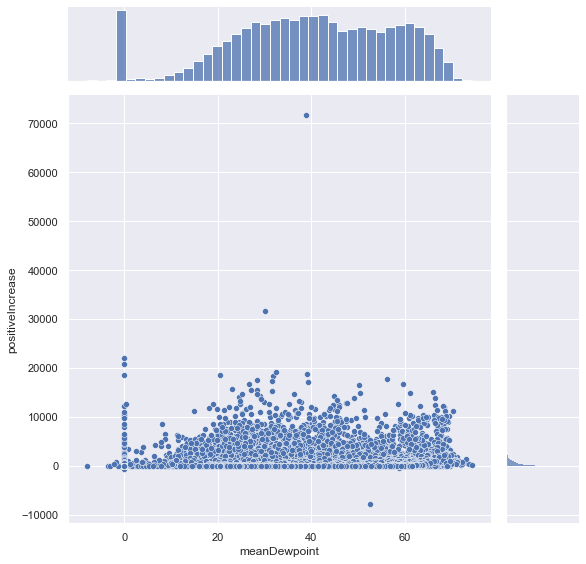

In [35]:
sb.jointplot(data = dewcaseDF, x = "meanDewpoint", y = "positiveIncrease", height = 8)

In [36]:
dewcaseDF.corr()

,meanDewpoint,positiveIncrease
meanDewpoint,1.000000,0.036871
positiveIncrease,0.036871,1.000000


<AxesSubplot:>

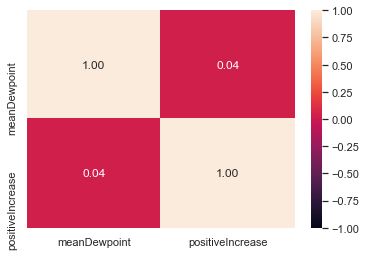

In [37]:
sb.heatmap(dewcaseDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### <font color='navy'>Dewpoint vs deathIncrease</font>

In [38]:
dewdeathDF = pd.concat([dewpoint, deathincrease], axis = 1).reindex(dewpoint.index)
dewdeathDF

,meanDewpoint,deathIncrease
0,0.000000,12
1,0.000000,8
2,0.000000,0
3,0.000000,1
4,8.977778,0
...,...,...
14311,24.500000,0
14312,24.650000,0
14313,20.450000,0
14314,24.500000,0


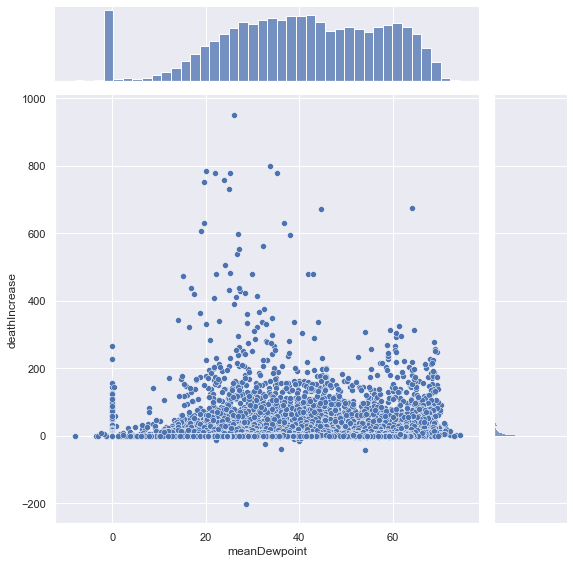

In [39]:
sb.jointplot(data = dewdeathDF, x = "meanDewpoint", y = "deathIncrease", height = 8)

In [40]:
dewdeathDF.corr()

,meanDewpoint,deathIncrease
meanDewpoint,1.00000,0.04278
deathIncrease,0.04278,1.00000


<AxesSubplot:>

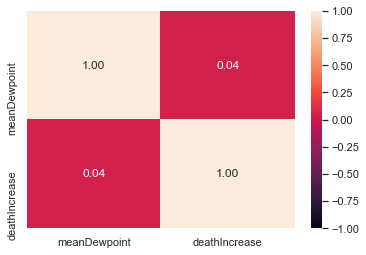

In [41]:
sb.heatmap(dewdeathDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### <font color='navy'>Using Log Transformation on Dewpoint vs deathIncrease</font>

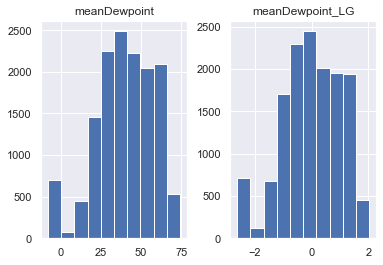

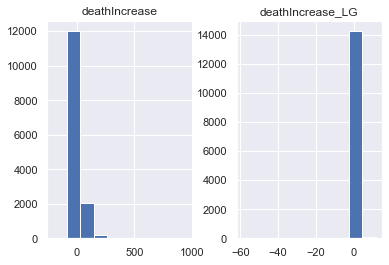

In [42]:
# Train the transform on the data
pow_trans.fit(dewdeathDF[['meanDewpoint']])
 
# Apply the power transform to the data
dewdeathDF['meanDewpoint_LG'] = pow_trans.transform(dewdeathDF[['meanDewpoint']])
 
# Plot the data before and after the transformation
dewdeathDF[['meanDewpoint', 'meanDewpoint_LG']].hist() 

# Train the transform on the data
pow_trans.fit(dewdeathDF[['deathIncrease']])
 
# Apply the power transform to the data
dewdeathDF['deathIncrease_LG'] = pow_trans.transform(dewdeathDF[['deathIncrease']])
 
# Plot the data before and after the transformation
dewdeathDF[['deathIncrease', 'deathIncrease_LG']].hist()

plt.show()

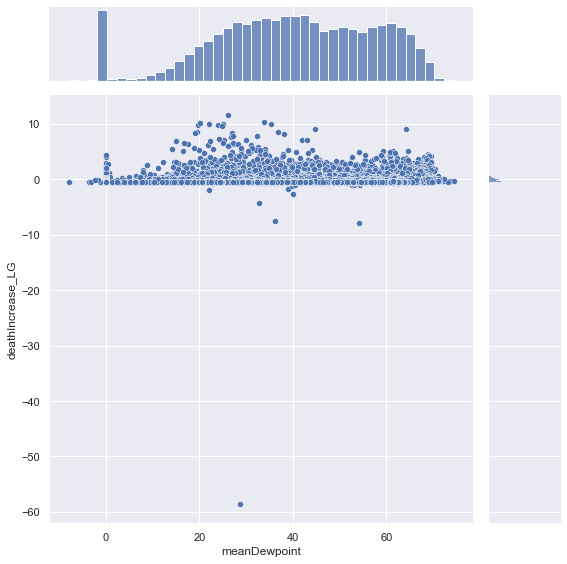

In [43]:
sb.jointplot(data = dewdeathDF, x = "meanDewpoint", y = "deathIncrease_LG", height = 8)

In [44]:
dewdeathDF.corr()

,meanDewpoint,deathIncrease,meanDewpoint_LG,deathIncrease_LG
meanDewpoint,1.000000,0.042780,0.999833,0.080741
deathIncrease,0.042780,1.000000,0.042152,0.852298
meanDewpoint_LG,0.999833,0.042152,1.000000,0.080193
deathIncrease_LG,0.080741,0.852298,0.080193,1.000000


### <font color='navy'>Precipitation vs positiveIncrease</font>

In [45]:
precaseDF = pd.concat([precipitation, positivecase], axis = 1).reindex(precipitation.index)
precaseDF

,meanPrecipitation,positiveIncrease
0,0.000000,750
1,0.000000,760
2,0.000000,697
3,0.000000,511
4,0.050741,507
...,...,...
14311,0.000000,1
14312,0.010000,1
14313,0.050000,0
14314,0.210000,1


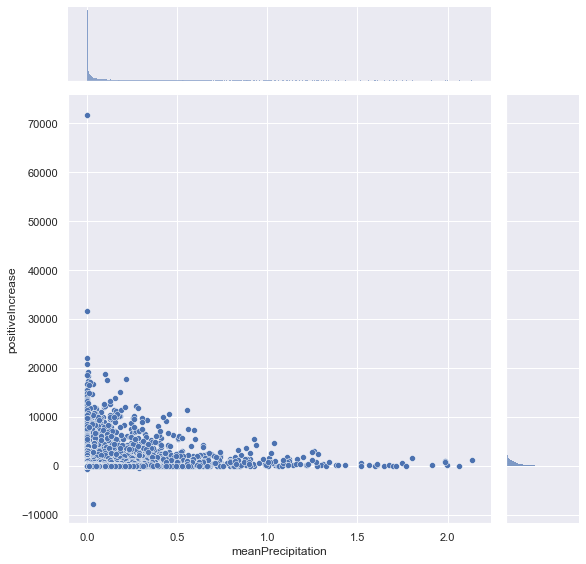

In [46]:
sb.jointplot(data = precaseDF, x = "meanPrecipitation", y = "positiveIncrease", height = 8)

In [47]:
precaseDF.corr()

,meanPrecipitation,positiveIncrease
meanPrecipitation,1.00000,-0.01037
positiveIncrease,-0.01037,1.00000


<AxesSubplot:>

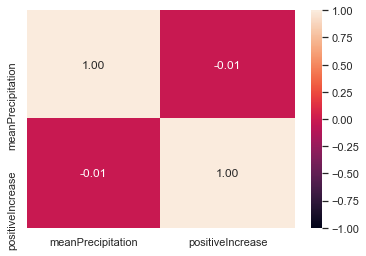

In [48]:
sb.heatmap(precaseDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### <font color='navy'>Precipitation vs deathIncrease</font>

In [49]:
predeathDF = pd.concat([precipitation, deathincrease], axis = 1).reindex(precipitation.index)
predeathDF

,meanPrecipitation,deathIncrease
0,0.000000,12
1,0.000000,8
2,0.000000,0
3,0.000000,1
4,0.050741,0
...,...,...
14311,0.000000,0
14312,0.010000,0
14313,0.050000,0
14314,0.210000,0


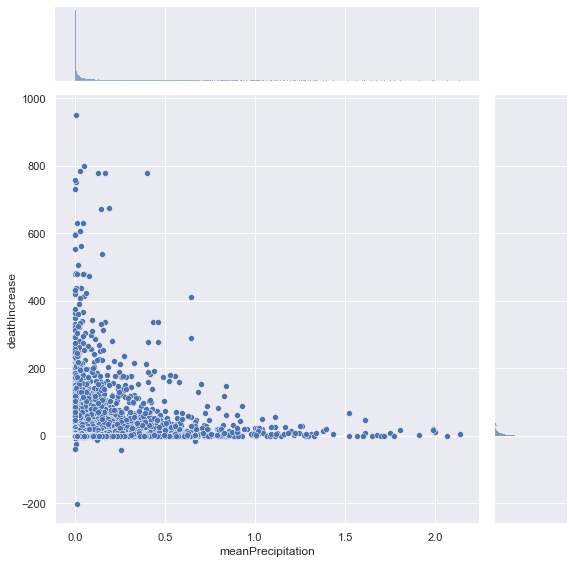

In [50]:
sb.jointplot(data = predeathDF, x = "meanPrecipitation", y = "deathIncrease", height = 8)

In [51]:
predeathDF.corr()

,meanPrecipitation,deathIncrease
meanPrecipitation,1.000000,0.016538
deathIncrease,0.016538,1.000000


<AxesSubplot:>

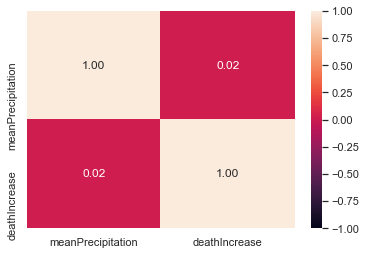

In [52]:
sb.heatmap(predeathDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### <font color='navy'>Using Log Transformation on precipitation vs deathIncrease</font>

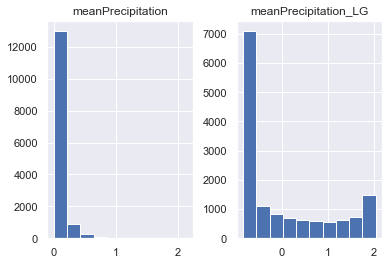

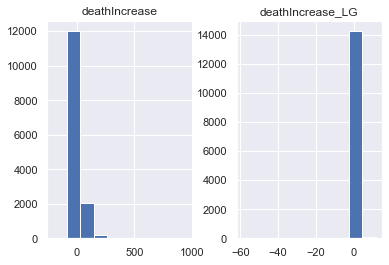

In [53]:
# Train the transform on the data
pow_trans.fit(predeathDF[['meanPrecipitation']])

# Apply the power transform to the data
predeathDF['meanPrecipitation_LG'] = pow_trans.transform(predeathDF[['meanPrecipitation']])

# Plot the data before and after the transformation
predeathDF[['meanPrecipitation', 'meanPrecipitation_LG']].hist()

# Train the transform on the data
pow_trans.fit(predeathDF[['deathIncrease']])
 
# Apply the power transform to the data
predeathDF['deathIncrease_LG'] = pow_trans.transform(predeathDF[['deathIncrease']])
 
# Plot the data before and after the transformation
predeathDF[['deathIncrease', 'deathIncrease_LG']].hist()

plt.show()

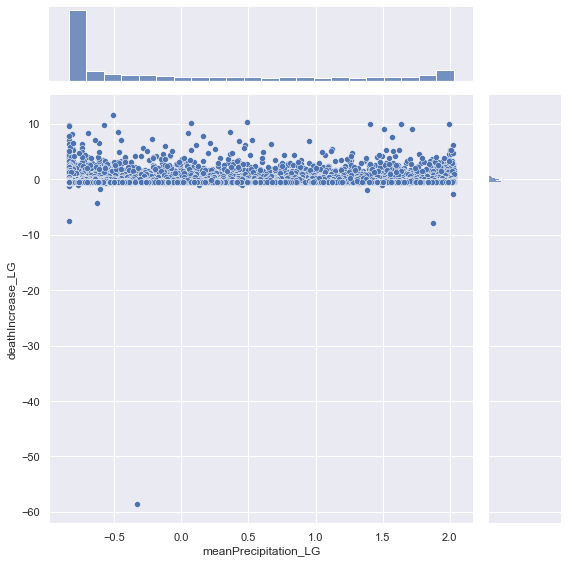

In [54]:
sb.jointplot(data = predeathDF, x = "meanPrecipitation_LG", y = "deathIncrease_LG", height = 8)

In [55]:
predeathDF.corr()

,meanPrecipitation,deathIncrease,meanPrecipitation_LG,deathIncrease_LG
meanPrecipitation,1.000000,0.016538,0.726234,0.020502
deathIncrease,0.016538,1.000000,0.037959,0.852298
meanPrecipitation_LG,0.726234,0.037959,1.000000,0.039947
deathIncrease_LG,0.020502,0.852298,0.039947,1.000000


### <font color='navy'>Windspeed vs positiveIncrease</font>

In [56]:
wspeedcaseDF = pd.concat([windspeed, positivecase], axis = 1).reindex(windspeed.index)
wspeedcaseDF

,meanWindSpeed,positiveIncrease
0,8.507418,750
1,8.507418,760
2,8.507418,697
3,8.507418,511
4,8.507418,507
...,...,...
14311,8.144320,1
14312,8.144320,1
14313,8.144320,0
14314,11.858791,1


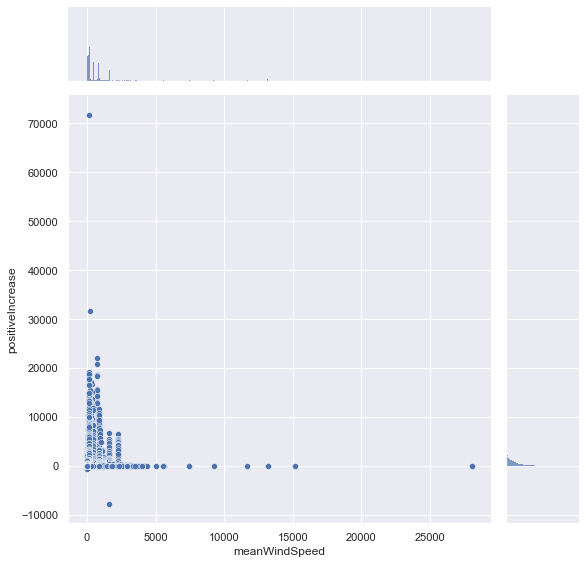

In [57]:
sb.jointplot(data = wspeedcaseDF, x = "meanWindSpeed", y = "positiveIncrease", height = 8)

In [58]:
wspeedcaseDF.corr()

,meanWindSpeed,positiveIncrease
meanWindSpeed,1.000000,0.003823
positiveIncrease,0.003823,1.000000


<AxesSubplot:>

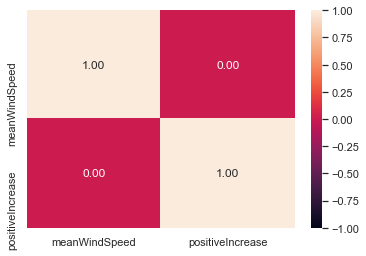

In [59]:
sb.heatmap(wspeedcaseDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### <font color='navy'>Windspeed vs deathIncrease</font>

In [60]:
wspeeddeathDF = pd.concat([windspeed, deathincrease], axis = 1).reindex(windspeed.index)
wspeeddeathDF

,meanWindSpeed,deathIncrease
0,8.507418,12
1,8.507418,8
2,8.507418,0
3,8.507418,1
4,8.507418,0
...,...,...
14311,8.144320,0
14312,8.144320,0
14313,8.144320,0
14314,11.858791,0


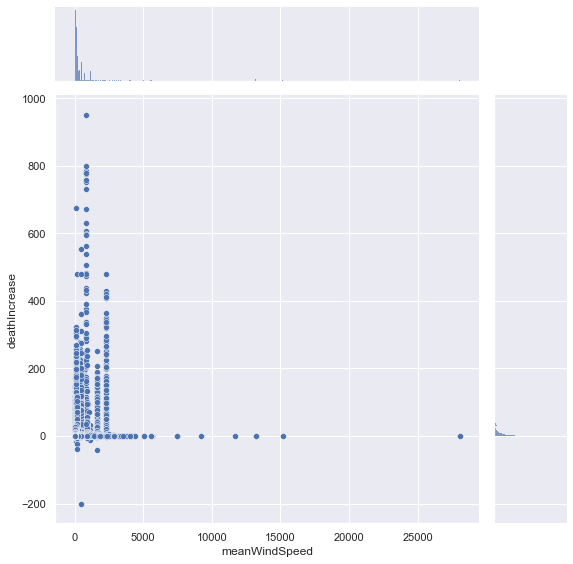

In [61]:
sb.jointplot(data = wspeeddeathDF, x = "meanWindSpeed", y = "deathIncrease", height = 8)

In [62]:
wspeeddeathDF.corr()

,meanWindSpeed,deathIncrease
meanWindSpeed,1.000000,0.079439
deathIncrease,0.079439,1.000000


<AxesSubplot:>

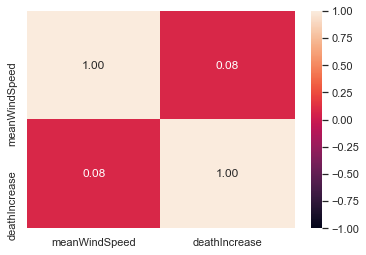

In [63]:
sb.heatmap(wspeeddeathDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### <font color='navy'>Using Log Transformation on WindSpeed vs deathIncrease</font>

<function matplotlib.pyplot.show(close=None, block=None)>

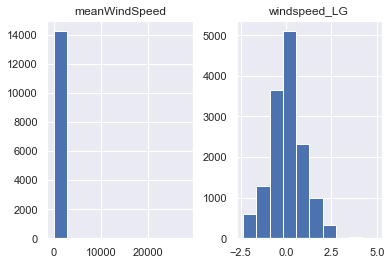

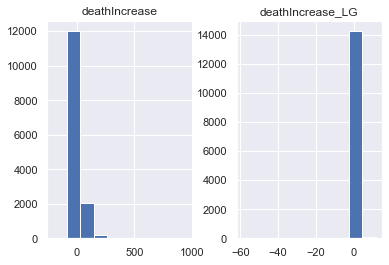

In [64]:
pow_trans = PowerTransformer()
 
# Train the transform on the data
pow_trans.fit(wspeeddeathDF[['meanWindSpeed']])
 
# Apply the power transform to the data
wspeeddeathDF['windspeed_LG'] = pow_trans.transform(wspeeddeathDF[['meanWindSpeed']])
 
# Plot the data before and after the transformation
wspeeddeathDF[['meanWindSpeed', 'windspeed_LG']].hist()

# Train the transform on the data
pow_trans.fit(wspeeddeathDF[['deathIncrease']])

# Apply the power transform to the data
wspeeddeathDF['deathIncrease_LG'] = pow_trans.transform(wspeeddeathDF[['deathIncrease']])

# Plot the data before and after the transformation
wspeeddeathDF[['deathIncrease', 'deathIncrease_LG']].hist()

plt.show

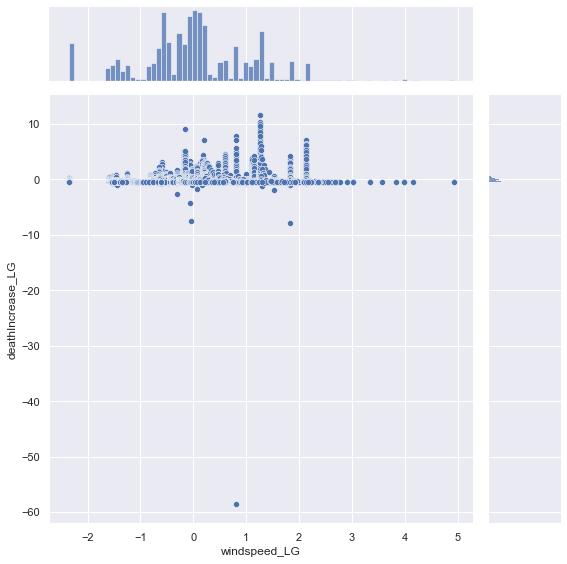

In [65]:
sb.jointplot(data = wspeeddeathDF, x = "windspeed_LG", y = "deathIncrease_LG", height = 8)

In [66]:
wspeeddeathDF.corr()

,meanWindSpeed,deathIncrease,windspeed_LG,deathIncrease_LG
meanWindSpeed,1.000000,0.079439,0.605689,0.064923
deathIncrease,0.079439,1.000000,0.216781,0.852298
windspeed_LG,0.605689,0.216781,1.000000,0.222499
deathIncrease_LG,0.064923,0.852298,0.222499,1.000000


### <font color='navy'>WindGust vs positiveIncrease</font>

In [67]:
wgustcaseDF = pd.concat([windgust, positivecase], axis = 1).reindex(windgust.index)
wgustcaseDF

,meanWindGust,positiveIncrease
0,0.000000,750
1,0.000000,760
2,0.000000,697
3,0.000000,511
4,4.362963,507
...,...,...
14311,8.950000,1
14312,7.800000,1
14313,6.850000,0
14314,11.000000,1


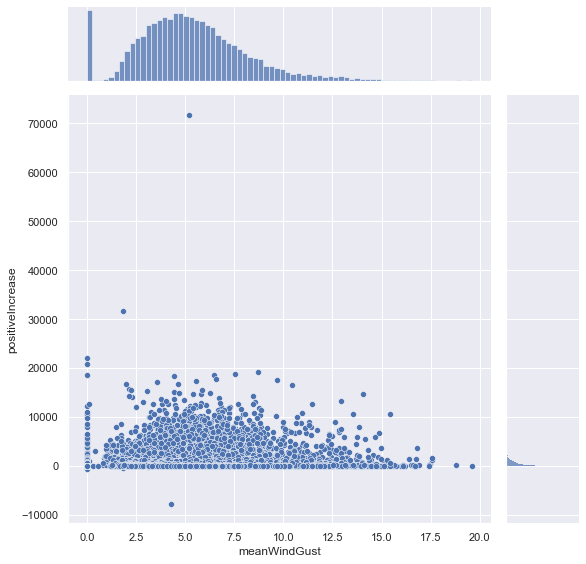

In [68]:
sb.jointplot(data = wgustcaseDF, x = "meanWindGust", y = "positiveIncrease", height = 8)

In [69]:
wgustcaseDF.corr()

,meanWindGust,positiveIncrease
meanWindGust,1.000000,0.007217
positiveIncrease,0.007217,1.000000


<AxesSubplot:>

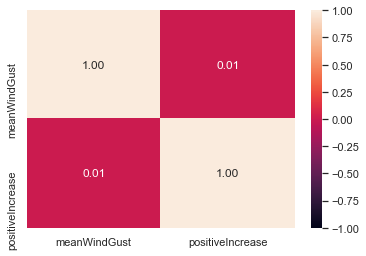

In [70]:
sb.heatmap(wgustcaseDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### <font color='navy'>WindGust vs deathIncrease</font>

In [71]:
wgustdeathDF = pd.concat([windgust, deathincrease], axis = 1).reindex(windgust.index)
wgustdeathDF

,meanWindGust,deathIncrease
0,0.000000,12
1,0.000000,8
2,0.000000,0
3,0.000000,1
4,4.362963,0
...,...,...
14311,8.950000,0
14312,7.800000,0
14313,6.850000,0
14314,11.000000,0


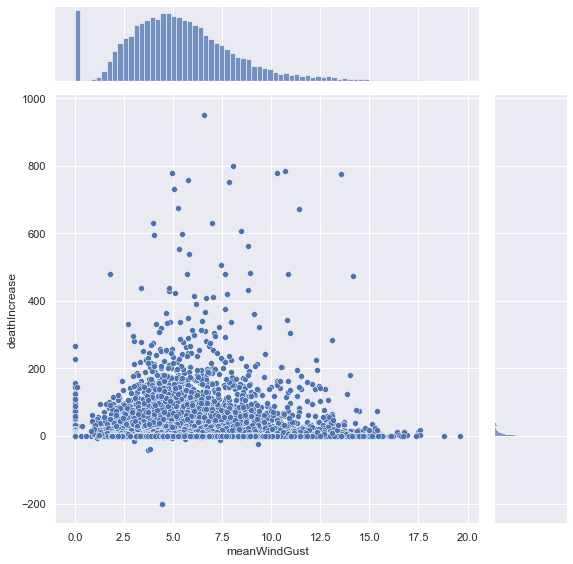

In [72]:
sb.jointplot(data = wgustdeathDF, x = "meanWindGust", y = "deathIncrease", height = 8)

In [73]:
wgustdeathDF.corr()

,meanWindGust,deathIncrease
meanWindGust,1.000000,0.043383
deathIncrease,0.043383,1.000000


<AxesSubplot:>

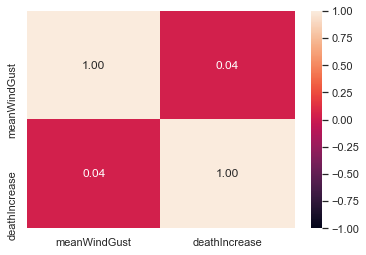

In [74]:
sb.heatmap(wgustdeathDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### <font color='navy'>Using Log Transformation on WindGust vs deathIncrease</font>

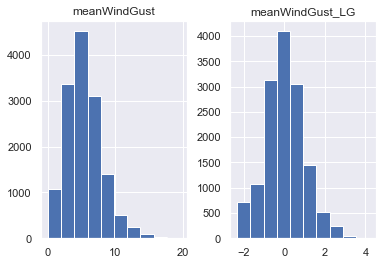

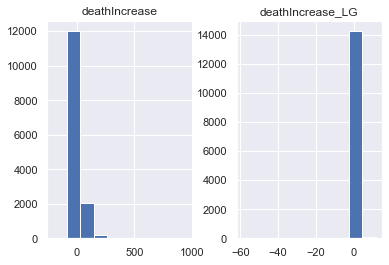

In [75]:
# Train the transform on the data
pow_trans.fit(wgustdeathDF[['meanWindGust']])
 
# Apply the power transform to the data
wgustdeathDF['meanWindGust_LG'] = pow_trans.transform(wgustdeathDF[['meanWindGust']])
 
# Plot the data before and after the transformation
wgustdeathDF[['meanWindGust', 'meanWindGust_LG']].hist()

# Train the transform on the data
pow_trans.fit(wgustdeathDF[['deathIncrease']])

# Apply the power transform to the data
wgustdeathDF['deathIncrease_LG'] = pow_trans.transform(wgustdeathDF[['deathIncrease']])

# Plot the data before and after the transformation
wgustdeathDF[['deathIncrease', 'deathIncrease_LG']].hist()

plt.show()

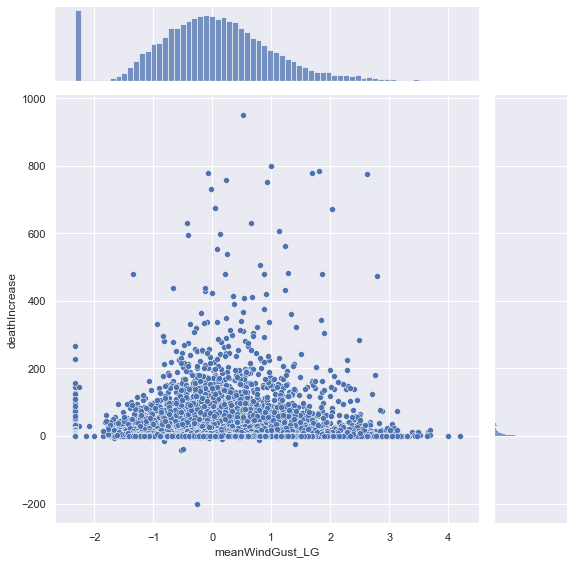

In [76]:
sb.jointplot(data = wgustdeathDF, x = "meanWindGust_LG", y = "deathIncrease", height = 8)

In [77]:
wgustdeathDF.corr()

,meanWindGust,deathIncrease,meanWindGust_LG,deathIncrease_LG
meanWindGust,1.000000,0.043383,0.992653,0.028801
deathIncrease,0.043383,1.000000,0.050016,0.852298
meanWindGust_LG,0.992653,0.050016,1.000000,0.037722
deathIncrease_LG,0.028801,0.852298,0.037722,1.000000


### <font color='navy'>Multi-Variate Statistics</font>

In [78]:
envDF = pd.DataFrame(all_merge[["deathIncrease","positiveIncrease","meanDewpoint", "meanTemperature", "meanPrecipitation","meanWindSpeed","meanWindGust"]])

print("Data type : ", type(envDF))
print("Data dims : ", envDF.size)

# Summary Statistics for all Variables
envDF.describe()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  100212


,deathIncrease,positiveIncrease,meanDewpoint,meanTemperature,meanPrecipitation,meanWindSpeed,meanWindGust
count,14316.000000,14316.000000,14316.000000,14316.000000,14316.000000,14316.000000,14316.000000
mean,18.822925,1001.759989,40.015470,57.235802,0.068267,359.826445,5.324972
std,44.776767,1912.966307,17.242911,18.961113,0.149825,862.686343,2.731863
min,-201.000000,-7757.000000,-8.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,71.000000,28.418709,47.323571,0.000000,55.537892,3.520152
50%,6.000000,393.000000,40.526510,61.192318,0.008750,143.754660,5.080000
75%,19.000000,1049.000000,54.010278,71.683069,0.068604,356.472644,6.842702
max,951.000000,71734.000000,74.379798,90.200000,2.136000,28069.675983,19.606000


In [79]:
envDF.head(10)

,deathIncrease,positiveIncrease,meanDewpoint,meanTemperature,meanPrecipitation,meanWindSpeed,meanWindGust
0,12,750,0.000000,0.000000,0.000000,8.507418,0.000000
1,8,760,0.000000,0.000000,0.000000,8.507418,0.000000
2,0,697,0.000000,0.000000,0.000000,8.507418,0.000000
3,1,511,0.000000,1.425926,0.000000,8.507418,0.000000
4,0,507,8.977778,18.640741,0.050741,8.507418,4.362963
5,0,612,11.522222,21.855556,0.183333,8.507418,6.922222
6,2,650,12.592593,22.807407,0.029259,8.507418,7.129630
7,0,662,14.174074,23.770370,0.049259,8.507418,4.025926
8,3,553,17.737037,28.722222,0.123333,8.507418,7.048148
9,0,670,14.711111,26.762963,0.049259,8.507418,8.907407


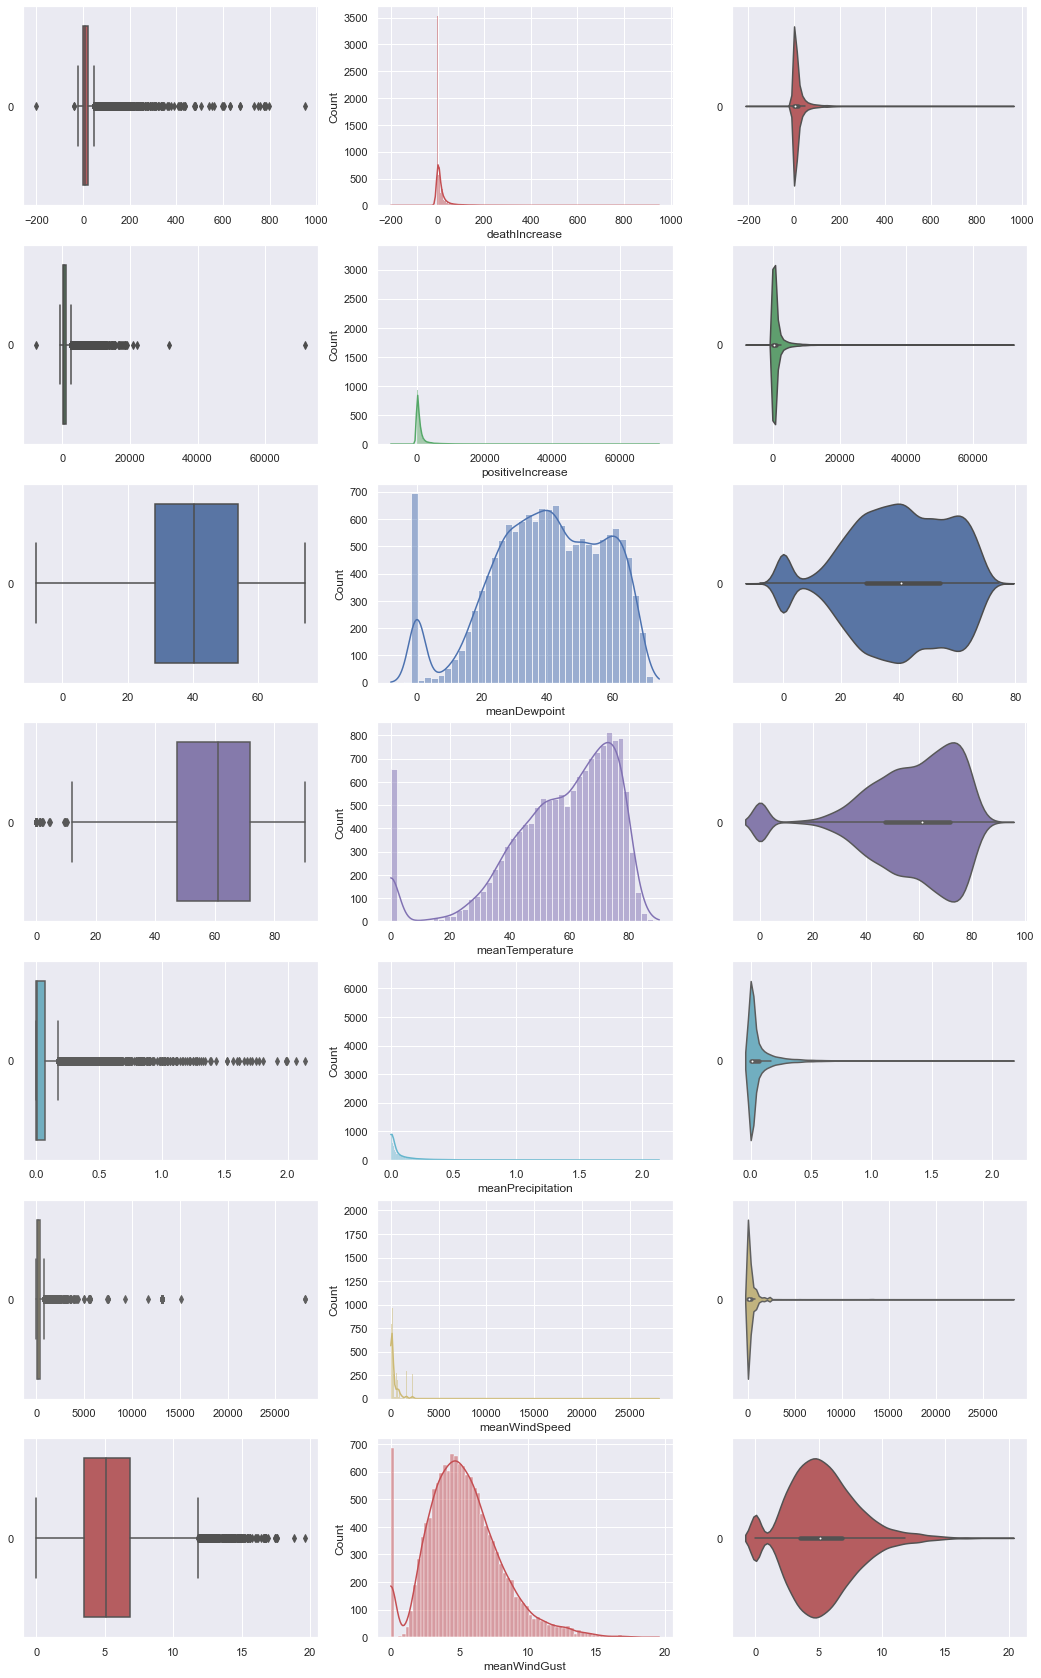

In [80]:
# Draw the distributions of all variables
f, axes = plt.subplots(7, 3, figsize=(18, 30))
colors = ["r", "g", "b", "m", "c", "y", "r", "g"]

count = 0
for var in envDF:
    sb.boxplot(data = envDF[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data = envDF[var], kde= True, color = colors[count], ax = axes[count,1])
    sb.violinplot(data = envDF[var], orient = "h", color = colors[count], ax = axes[count,2])
    count += 1

In [81]:
# Calculate the complete  correlation matrix
envDF.corr()

,deathIncrease,positiveIncrease,meanDewpoint,meanTemperature,meanPrecipitation,meanWindSpeed,meanWindGust
deathIncrease,1.000000,0.530626,0.042780,0.035357,0.016538,0.079439,0.043383
positiveIncrease,0.530626,1.000000,0.036871,0.002070,-0.010370,0.003823,0.007217
meanDewpoint,0.042780,0.036871,1.000000,0.856628,0.204298,-0.063370,0.049476
meanTemperature,0.035357,0.002070,0.856628,1.000000,0.098071,0.000839,0.154470
meanPrecipitation,0.016538,-0.010370,0.204298,0.098071,1.000000,0.023867,0.156923
meanWindSpeed,0.079439,0.003823,-0.063370,0.000839,0.023867,1.000000,-0.045195
meanWindGust,0.043383,0.007217,0.049476,0.154470,0.156923,-0.045195,1.000000


<AxesSubplot:>

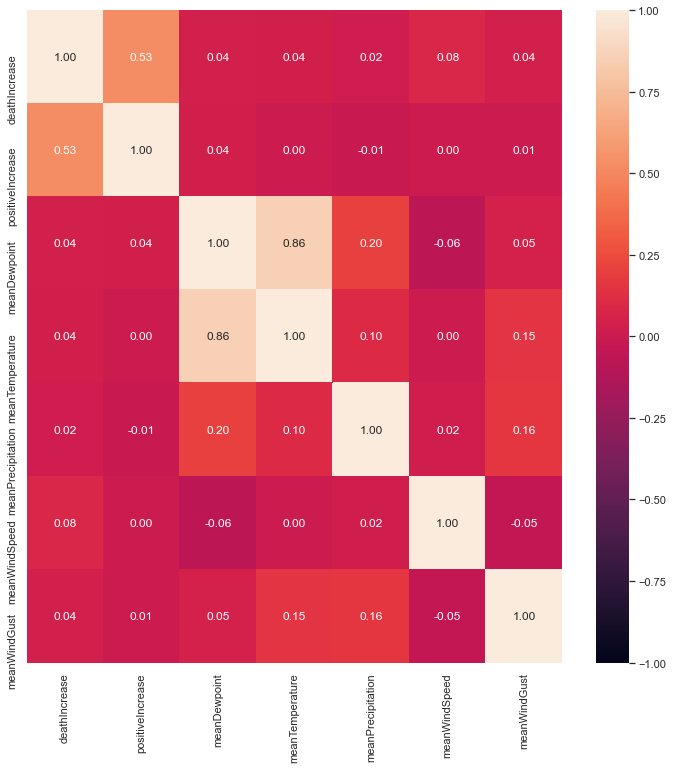

In [82]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(envDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

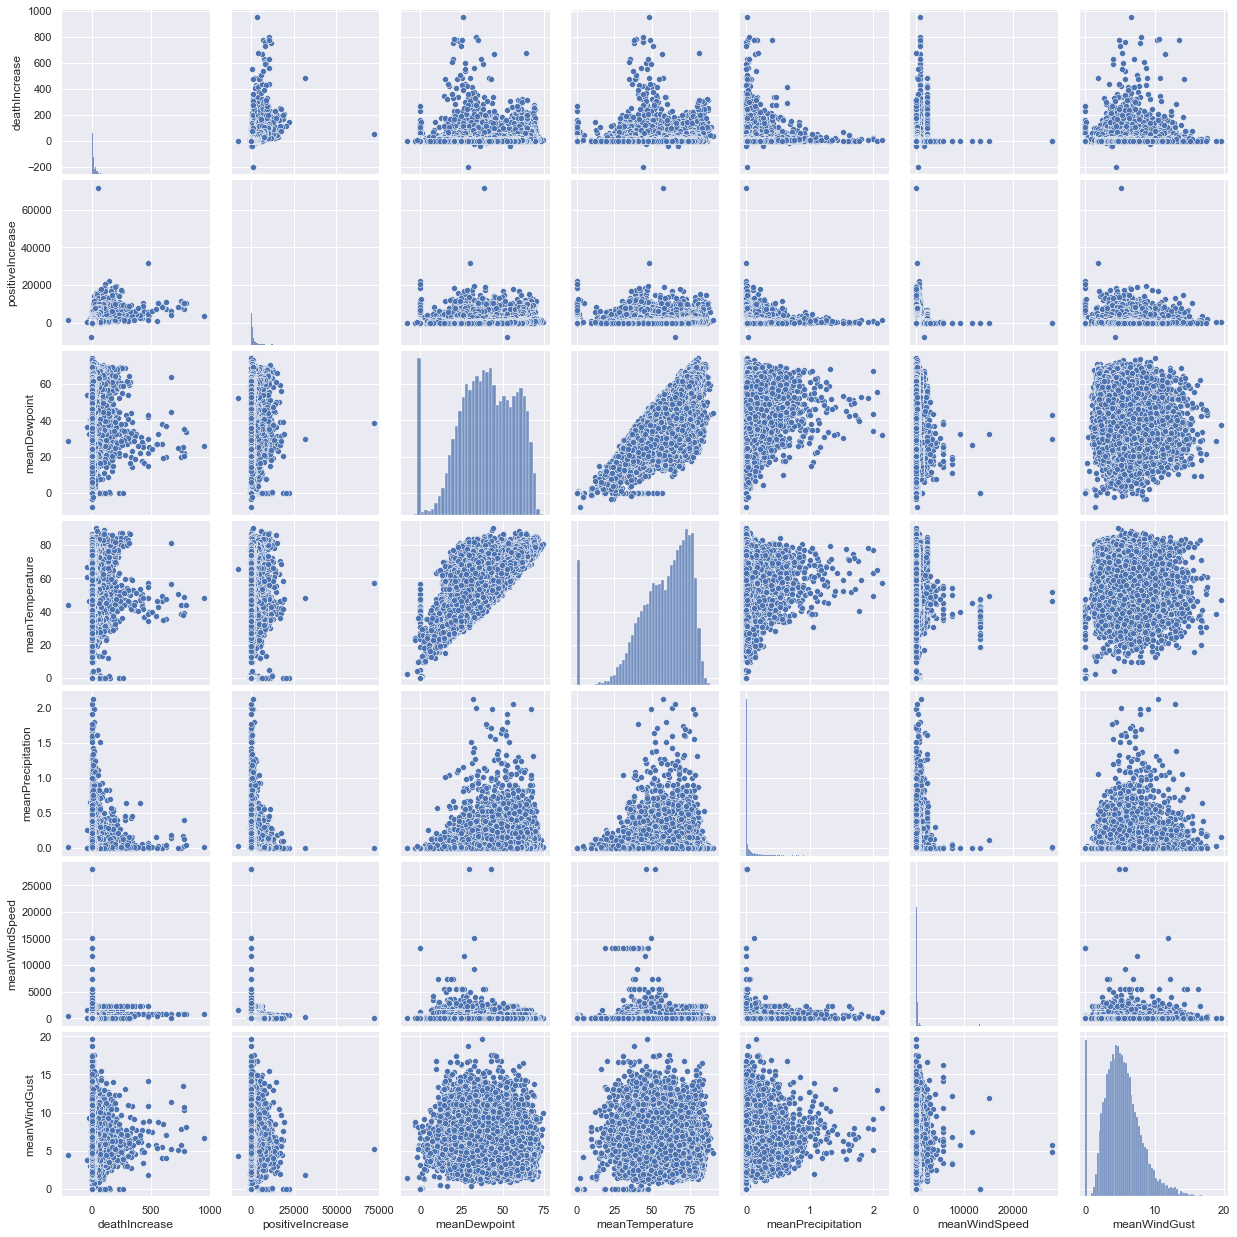

In [83]:
# Draw pairs of variables against one another
sb.pairplot(data = envDF)

## <font color='Indigo'>Machine Learning</font> 

## Uni-Variate Linear Regression
  

Response Variable : **deathIncrease**     
Predictor Feature : **meanDewpoint, meanTemperature, meanPrecipitation, meanWindSpeed, meanWindGust**       

> Regression Model : deathIncrease = $a_1$ $\times$ (Predictor Feature) + $b_1$

Intercept of Regression 	: b =  [815.62628506]
Coefficients of Regression 	: a =  [[4.67183576]]

     Predictors  Coefficients
0  meanDewpoint      4.671836



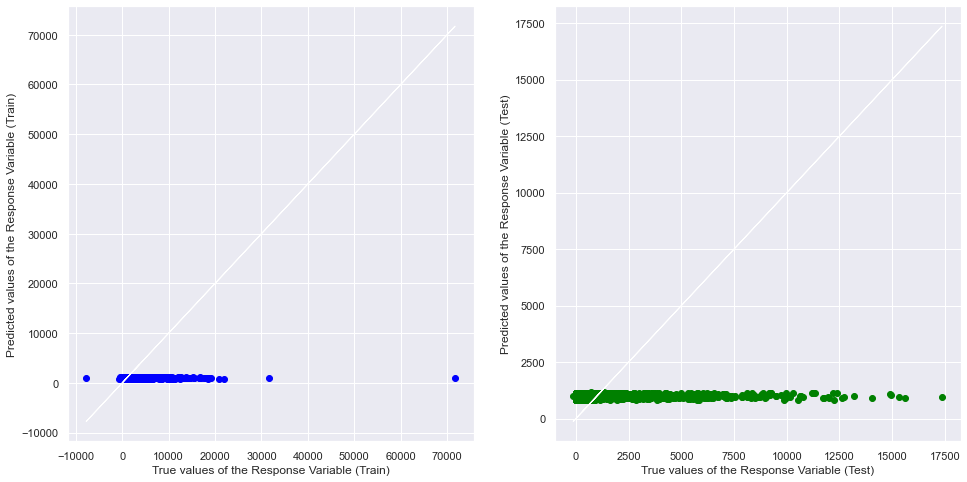

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0017084260254811579
Mean Squared Error (MSE) 	: 3830533.3533929805
Root Mean Squared Error (RMSE) 	: 1957.1748397608683

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -5.680815756048396e-05
Mean Squared Error (MSE) 	: 3125644.2562670102
Root Mean Squared Error (RMSE) 	: 1767.9491667655523

Intercept of Regression 	: b =  [970.4881111]
Coefficients of Regression 	: a =  [[0.55803564]]

        Predictors  Coefficients
0  meanTemperature      0.558036



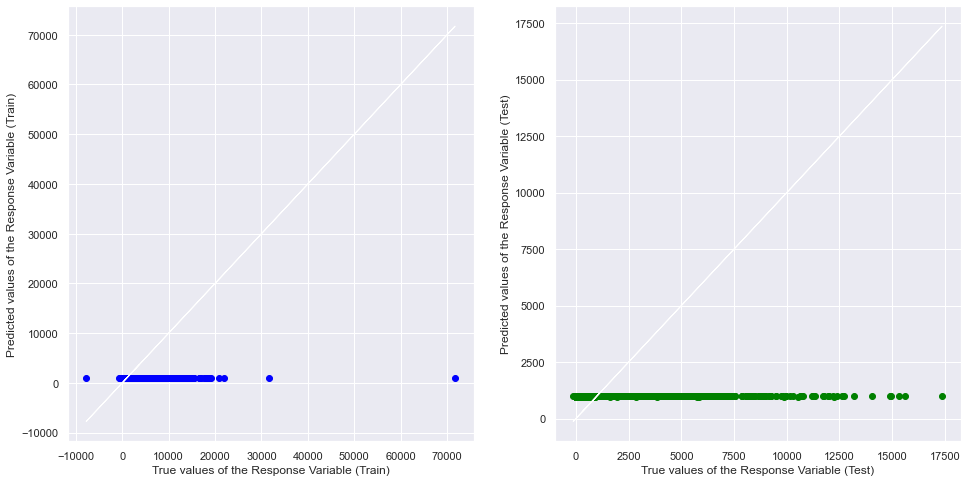

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 2.9514958190812735e-05
Mean Squared Error (MSE) 	: 3836975.48413744
Root Mean Squared Error (RMSE) 	: 1958.8199213142182

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.00014689416388091736
Mean Squared Error (MSE) 	: 3125925.817080285
Root Mean Squared Error (RMSE) 	: 1768.028794188682

Intercept of Regression 	: b =  [1008.62932711]
Coefficients of Regression 	: a =  [[-91.56018131]]

          Predictors  Coefficients
0  meanPrecipitation    -91.560181



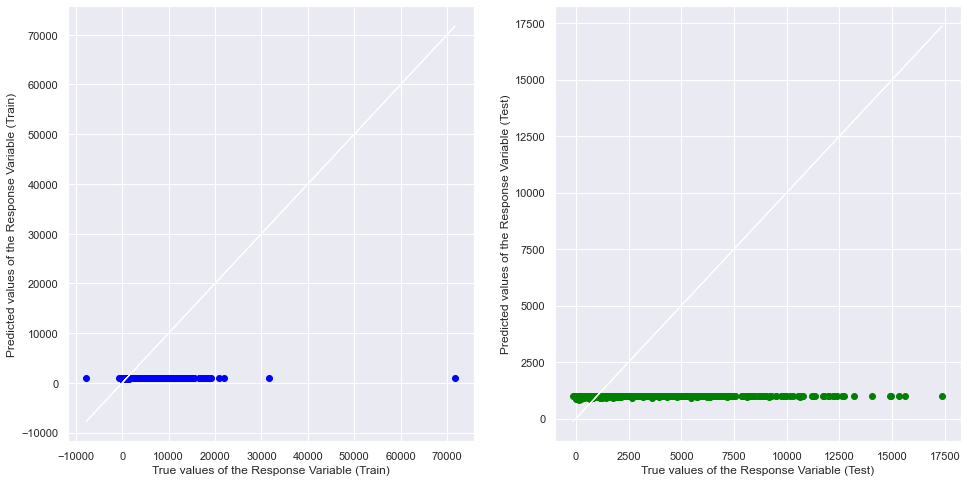

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 4.9103257545368706e-05
Mean Squared Error (MSE) 	: 3836900.322094636
Root Mean Squared Error (RMSE) 	: 1958.8007356785008

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0002727656976918569
Mean Squared Error (MSE) 	: 3124614.1841558237
Root Mean Squared Error (RMSE) 	: 1767.6578243980998

Intercept of Regression 	: b =  [1003.98479711]
Coefficients of Regression 	: a =  [[-0.00430033]]

      Predictors  Coefficients
0  meanWindSpeed       -0.0043



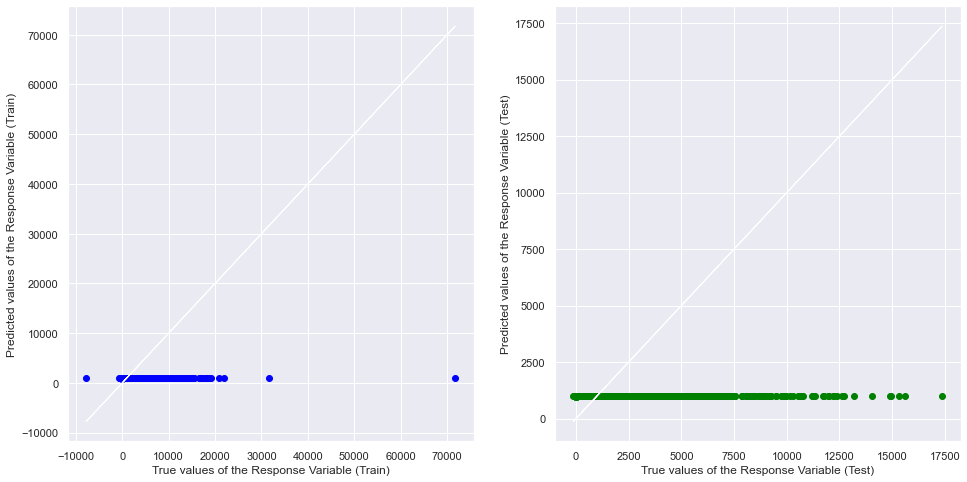

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 4.0557900878868125e-06
Mean Squared Error (MSE) 	: 3837073.173224587
Root Mean Squared Error (RMSE) 	: 1958.8448568543113

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.00010417019120989579
Mean Squared Error (MSE) 	: 3125792.284726227
Root Mean Squared Error (RMSE) 	: 1767.9910307256164

Intercept of Regression 	: b =  [969.10262212]
Coefficients of Regression 	: a =  [[6.27279814]]

     Predictors  Coefficients
0  meanWindGust      6.272798



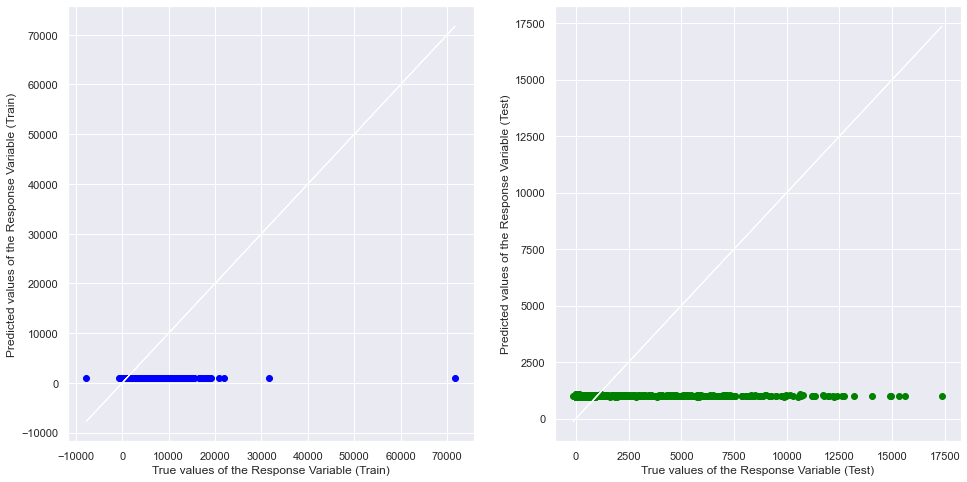

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 7.692110650514561e-05
Mean Squared Error (MSE) 	: 3836793.582539743
Root Mean Squared Error (RMSE) 	: 1958.7734893396282

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -5.586700788717813e-05
Mean Squared Error (MSE) 	: 3125641.3147350424
Root Mean Squared Error (RMSE) 	: 1767.948334860225



In [84]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

for i in envDF[["meanDewpoint", "meanTemperature", "meanPrecipitation", "meanWindSpeed", "meanWindGust"]]:

    # Extract Response and Predictors
    y = pd.DataFrame(envDF["positiveIncrease"])
    X = pd.DataFrame(envDF[i])
 
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
 
    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model
 
    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()
 
    # Print the Coefficients against Predictors
    print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
    print()
 
    # Predict Total values corresponding to HP
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
 
    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(16, 8))
    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(y_test, y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    plt.show()
 
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print()
 
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
    print()   

---

## Multi-Variate Linear Regression
  

Response Variable : **deathIncrease**     
Predictor Feature : **meanDewpoint, meanTemperature, meanPrecipitation, meanWindSpeed, meanWindGust**       

> Regression Model : deathIncrease = $a_1$ $\times$ meanDewpoint + $a_2$ $\times$ meanTemperature + $a_3$ $\times$ meanPrecipitation + $a_4$ $\times$ meanWindSpeed + $a_5$ $\times$ meanWindGust

#### Regression with Random Train-Test Split

Split the Train and Test sets randomly, and perform Linear Regression.

### <font color='navy'>Ordinary Regression</font>

Intercept of Regression 	: b =  [9.97997238]
Coefficients of Regression 	: a =  [[ 0.24564295 -0.11166629 -1.54934592  0.00380103  0.75158226]]

          Predictors  Coefficients
0       meanDewpoint      0.245643
1    meanTemperature     -0.111666
2  meanPrecipitation     -1.549346
3      meanWindSpeed      0.003801
4       meanWindGust      0.751582



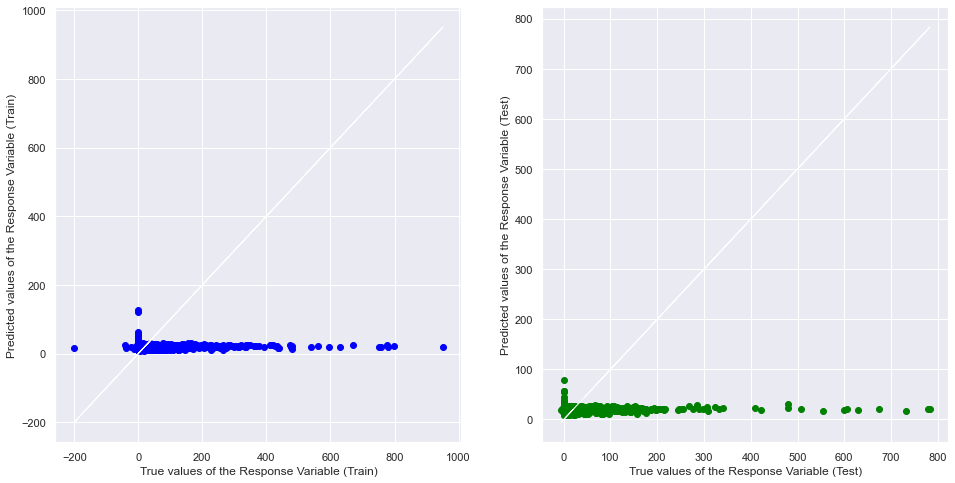

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.01045380645892613
Mean Squared Error (MSE) 	: 1873.362745505011
Root Mean Squared Error (RMSE) 	: 43.2823606738936

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.011701443478922435
Mean Squared Error (MSE) 	: 2312.243090070252
Root Mean Squared Error (RMSE) 	: 48.08578885773064


In [85]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

# Extract Response and Predictors
y = pd.DataFrame(envDF["deathIncrease"])
X = pd.DataFrame(envDF[["meanDewpoint", "meanTemperature", "meanPrecipitation", "meanWindSpeed", "meanWindGust" ]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#scaler = StandardScaler()
#scaler.fit(X_train)
#scaler.transform(X_train)
#scaler.transform(X_test)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

### <font color='navy'>Using Log Transformation on Regression</font>

Regression with Random Train-Test Split using log transform

Split the Train and Test sets randomly, apply log transform, and perform Linear Regression.

Intercept of Regression 	: b =  [18.69544566]
Coefficients of Regression 	: a =  [[ 2.21673669 -3.21152284 -0.17349164  9.57272198  1.12140979]]




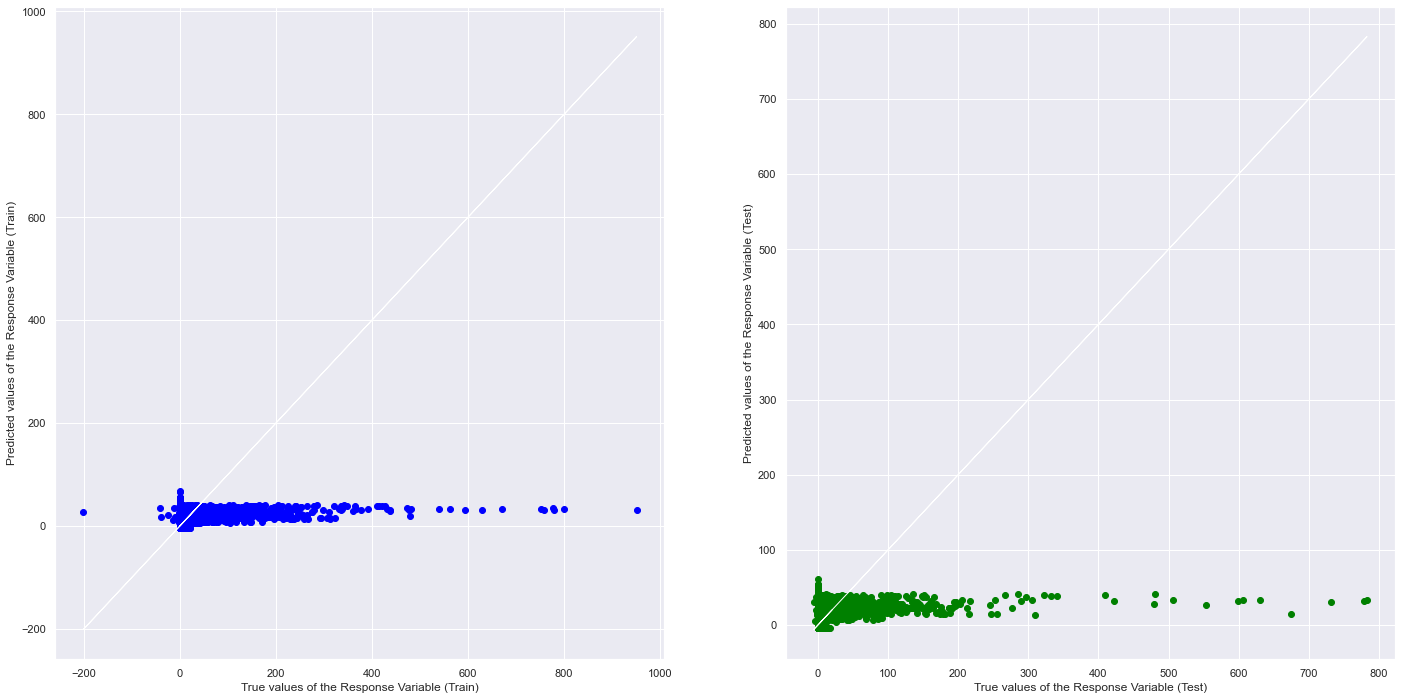

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.048451212591124726
Mean Squared Error (MSE) 	: 1801.4278267124303
Root Mean Squared Error (RMSE) 	: 42.443230634724664

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.05028042549075806
Mean Squared Error (MSE) 	: 2221.982931345727
Root Mean Squared Error (RMSE) 	: 47.13791394775258



In [86]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

# Extract Response and Predictors
y = pd.DataFrame(envDF["deathIncrease"])
X = pd.DataFrame(envDF[["meanDewpoint", "meanTemperature", "meanPrecipitation", "meanWindSpeed", "meanWindGust" ]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

pow_trans = PowerTransformer()    # Instantiate PowerTransformer
pow_trans.fit(X_train)   # Train the transform on the data
X_train_LG = pd.DataFrame(pow_trans.transform(X_train))   # Apply the power transform to the data
X_test_LG = pd.DataFrame(pow_trans.transform(X_test))

X_train_LG

#scaler = StandardScaler()
#scaler.fit(X_train)
#scaler.transform(X_train)
#scaler.transform(X_test)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train_LG, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
columns_ =X_train_LG.iloc[:1, 3:12].columns

pd.DataFrame(list(zip(X_train_LG.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train_LG)
y_test_pred = linreg.predict(X_test_LG)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train_LG, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test_LG, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

### <font color='navy'>Polynomial Regression</font>

### <font color='navy'>Trying out different powers and multiplications of different variables</font>

In [87]:
from sklearn.preprocessing import PolynomialFeatures

In [88]:
poly = PolynomialFeatures(3,include_bias=False)

In [89]:
X_poly = poly.fit_transform(X_train_LG)
X_poly_feature_name = poly.get_feature_names(['Variable'+str(l) for l in range(1,6)])
print(X_poly_feature_name)
print(len(X_poly_feature_name))

['Variable1', 'Variable2', 'Variable3', 'Variable4', 'Variable5', 'Variable1^2', 'Variable1 Variable2', 'Variable1 Variable3', 'Variable1 Variable4', 'Variable1 Variable5', 'Variable2^2', 'Variable2 Variable3', 'Variable2 Variable4', 'Variable2 Variable5', 'Variable3^2', 'Variable3 Variable4', 'Variable3 Variable5', 'Variable4^2', 'Variable4 Variable5', 'Variable5^2', 'Variable1^3', 'Variable1^2 Variable2', 'Variable1^2 Variable3', 'Variable1^2 Variable4', 'Variable1^2 Variable5', 'Variable1 Variable2^2', 'Variable1 Variable2 Variable3', 'Variable1 Variable2 Variable4', 'Variable1 Variable2 Variable5', 'Variable1 Variable3^2', 'Variable1 Variable3 Variable4', 'Variable1 Variable3 Variable5', 'Variable1 Variable4^2', 'Variable1 Variable4 Variable5', 'Variable1 Variable5^2', 'Variable2^3', 'Variable2^2 Variable3', 'Variable2^2 Variable4', 'Variable2^2 Variable5', 'Variable2 Variable3^2', 'Variable2 Variable3 Variable4', 'Variable2 Variable3 Variable5', 'Variable2 Variable4^2', 'Variable2

In [90]:
envDF_poly = pd.DataFrame(X_poly, columns=X_poly_feature_name)
envDF_poly.head()

,Variable1,Variable2,Variable3,Variable4,Variable5,Variable1^2,Variable1 Variable2,Variable1 Variable3,Variable1 Variable4,Variable1 Variable5,...,Variable3^3,Variable3^2 Variable4,Variable3^2 Variable5,Variable3 Variable4^2,Variable3 Variable4 Variable5,Variable3 Variable5^2,Variable4^3,Variable4^2 Variable5,Variable4 Variable5^2,Variable5^3
0,-0.566662,-0.842612,0.759833,-1.576814,1.043206,0.321106,0.477476,-0.430568,0.893520,-0.591145,...,0.438687,-0.910367,0.602291,1.889204,-1.249881,0.826910,-3.920496,2.593766,-1.716012,1.135299
1,-0.896230,-1.453920,0.317366,-0.022433,-1.439602,0.803228,1.303046,-0.284433,0.020105,1.290214,...,0.031966,-0.002260,-0.144999,0.000160,0.010249,0.657727,-0.000011,-0.000724,-0.046492,-2.983510
2,-0.372090,-1.176788,1.307838,0.157024,-0.221589,0.138451,0.437871,-0.486634,-0.058427,0.082451,...,2.236980,0.268580,-0.379014,0.032247,-0.045506,0.064217,0.003872,-0.005464,0.007710,-0.010880
3,-2.249386,-2.465324,-0.841346,0.181040,-2.312172,5.059740,5.545468,1.892513,-0.407228,5.200968,...,-0.595558,0.128151,-1.636702,-0.027575,0.352183,-4.497953,0.005934,-0.075782,0.967862,-12.361190
4,-1.417363,-1.791951,-0.701825,-0.643339,0.483908,2.008918,2.539845,0.994740,0.911845,-0.685874,...,-0.345689,-0.316882,0.238353,-0.290475,0.218490,-0.164344,-0.266269,0.200283,-0.150649,0.113316


In [91]:
envDF_poly['positiveIncrease']= envDF['positiveIncrease']
envDF_poly.head()

,Variable1,Variable2,Variable3,Variable4,Variable5,Variable1^2,Variable1 Variable2,Variable1 Variable3,Variable1 Variable4,Variable1 Variable5,...,Variable3^2 Variable4,Variable3^2 Variable5,Variable3 Variable4^2,Variable3 Variable4 Variable5,Variable3 Variable5^2,Variable4^3,Variable4^2 Variable5,Variable4 Variable5^2,Variable5^3,positiveIncrease
0,-0.566662,-0.842612,0.759833,-1.576814,1.043206,0.321106,0.477476,-0.430568,0.893520,-0.591145,...,-0.910367,0.602291,1.889204,-1.249881,0.826910,-3.920496,2.593766,-1.716012,1.135299,750
1,-0.896230,-1.453920,0.317366,-0.022433,-1.439602,0.803228,1.303046,-0.284433,0.020105,1.290214,...,-0.002260,-0.144999,0.000160,0.010249,0.657727,-0.000011,-0.000724,-0.046492,-2.983510,760
2,-0.372090,-1.176788,1.307838,0.157024,-0.221589,0.138451,0.437871,-0.486634,-0.058427,0.082451,...,0.268580,-0.379014,0.032247,-0.045506,0.064217,0.003872,-0.005464,0.007710,-0.010880,697
3,-2.249386,-2.465324,-0.841346,0.181040,-2.312172,5.059740,5.545468,1.892513,-0.407228,5.200968,...,0.128151,-1.636702,-0.027575,0.352183,-4.497953,0.005934,-0.075782,0.967862,-12.361190,511
4,-1.417363,-1.791951,-0.701825,-0.643339,0.483908,2.008918,2.539845,0.994740,0.911845,-0.685874,...,-0.316882,0.238353,-0.290475,0.218490,-0.164344,-0.266269,0.200283,-0.150649,0.113316,507


<AxesSubplot:>

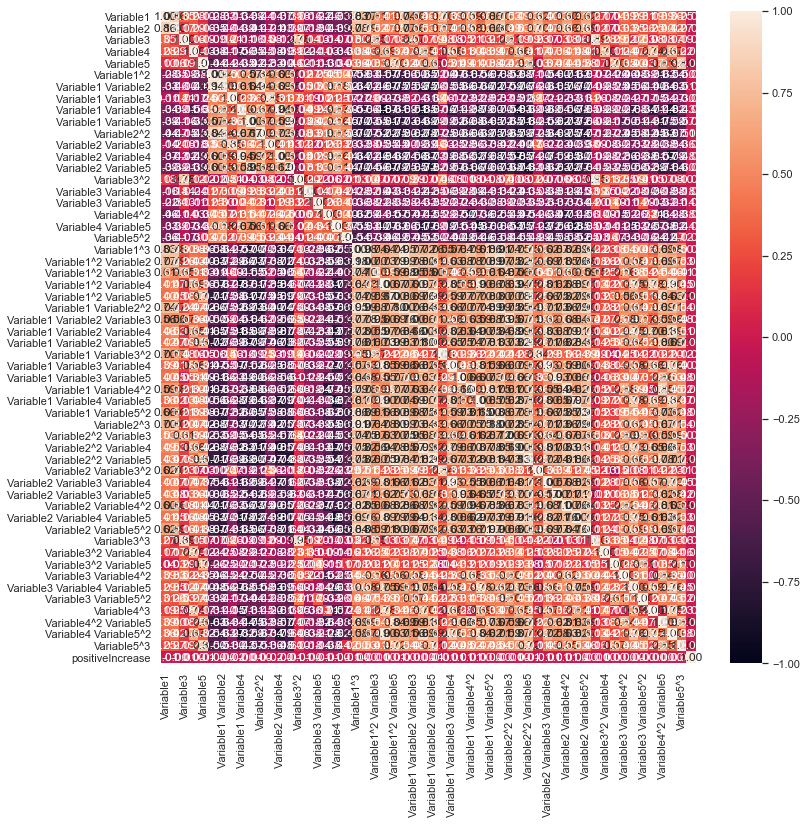

In [92]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(envDF_poly.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

sb.pairplot(data = envDF_poly)

### <font color='navy'>Univariate Regression for envDF_poly</font>

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(envDF))
scaler.transform(envDF)

for i in envDF_poly:

        # Extract Response and Predictors
        y = pd.DataFrame(envDF_poly["positiveIncrease"])
        X = pd.DataFrame(envDF_poly[i])

        # Split the Dataset into Train and Test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

        # Linear Regression using Train Data
        linreg = LinearRegression()         # create the linear regression object
        linreg.fit(X_train, y_train)        # train the linear regression model

        # Coefficients of the Linear Regression line
        print('Intercept of Regression \t: b = ', linreg.intercept_)
        print('Coefficients of Regression \t: a = ', linreg.coef_)
        print()

        # Print the Coefficients against Predictors
        print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
        print()

        # Predict Total values corresponding to HP
        y_train_pred = linreg.predict(X_train)
        y_test_pred = linreg.predict(X_test)

        # Plot the Predictions vs the True values
        f, axes = plt.subplots(1, 2, figsize=(24, 12))
        axes[0].scatter(y_train, y_train_pred, color = "blue")
        axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
        axes[0].set_xlabel("True values of the Response Variable (Train)")
        axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
        axes[1].scatter(y_test, y_test_pred, color = "green")
        axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
        axes[1].set_xlabel("True values of the Response Variable (Test)")
        axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
        plt.show()

        # Check the Goodness of Fit (on Train Data)
        print("Goodness of Fit of Model \tTrain Dataset")
        print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
        print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
        print()

        # Check the Goodness of Fit (on Test Data)
        print("Goodness of Fit of Model \tTest Dataset")
        print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
        print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
        print()



 ### <font color='navy'>Mutivariate Regression for envDF_poly</font>

In [93]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(envDF_poly['positiveIncrease'])
X = pd.DataFrame(envDF_poly['Variable1', 'Variable2', 'Variable3', 'Variable4', 'Variable5', 'Variable1^2', 'Variable1 Variable2', 'Variable1 Variable3', 'Variable1 Variable4', 'Variable1 Variable5', 'Variable2^2', 'Variable2 Variable3', 'Variable2 Variable4', 'Variable2 Variable5', 'Variable3^2', 'Variable3 Variable4', 'Variable3 Variable5', 'Variable4^2', 'Variable4 Variable5', 'Variable5^2', 'Variable1^3', 'Variable1^2 Variable2', 'Variable1^2 Variable3', 'Variable1^2 Variable4', 'Variable1^2 Variable5', 'Variable1 Variable2^2', 'Variable1 Variable2 Variable3', 'Variable1 Variable2 Variable4', 'Variable1 Variable2 Variable5', 'Variable1 Variable3^2', 'Variable1 Variable3 Variable4', 'Variable1 Variable3 Variable5', 'Variable1 Variable4^2', 'Variable1 Variable4 Variable5', 'Variable1 Variable5^2', 'Variable2^3', 'Variable2^2 Variable3', 'Variable2^2 Variable4', 'Variable2^2 Variable5', 'Variable2 Variable3^2', 'Variable2 Variable3 Variable4', 'Variable2 Variable3 Variable5', 'Variable2 Variable4^2', 'Variable2 Variable4 Variable5', 'Variable2 Variable5^2', 'Variable3^3', 'Variable3^2 Variable4', 'Variable3^2 Variable5', 'Variable3 Variable4^2', 'Variable3 Variable4 Variable5', 'Variable3 Variable5^2', 'Variable4^3', 'Variable4^2 Variable5', 'Variable4 Variable5^2', 'Variable5^3'])
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

KeyError: ('Variable1', 'Variable2', 'Variable3', 'Variable4', 'Variable5', 'Variable1^2', 'Variable1 Variable2', 'Variable1 Variable3', 'Variable1 Variable4', 'Variable1 Variable5', 'Variable2^2', 'Variable2 Variable3', 'Variable2 Variable4', 'Variable2 Variable5', 'Variable3^2', 'Variable3 Variable4', 'Variable3 Variable5', 'Variable4^2', 'Variable4 Variable5', 'Variable5^2', 'Variable1^3', 'Variable1^2 Variable2', 'Variable1^2 Variable3', 'Variable1^2 Variable4', 'Variable1^2 Variable5', 'Variable1 Variable2^2', 'Variable1 Variable2 Variable3', 'Variable1 Variable2 Variable4', 'Variable1 Variable2 Variable5', 'Variable1 Variable3^2', 'Variable1 Variable3 Variable4', 'Variable1 Variable3 Variable5', 'Variable1 Variable4^2', 'Variable1 Variable4 Variable5', 'Variable1 Variable5^2', 'Variable2^3', 'Variable2^2 Variable3', 'Variable2^2 Variable4', 'Variable2^2 Variable5', 'Variable2 Variable3^2', 'Variable2 Variable3 Variable4', 'Variable2 Variable3 Variable5', 'Variable2 Variable4^2', 'Variable2 Variable4 Variable5', 'Variable2 Variable5^2', 'Variable3^3', 'Variable3^2 Variable4', 'Variable3^2 Variable5', 'Variable3 Variable4^2', 'Variable3 Variable4 Variable5', 'Variable3 Variable5^2', 'Variable4^3', 'Variable4^2 Variable5', 'Variable4 Variable5^2', 'Variable5^3')

In [ ]:
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)
sb.pairplot(data = trainDF)

In [ ]:
X_train=envDF_poly.drop('positiveIncrease',axis=1)
y_train=envDF_poly['positiveIncrease']

In [ ]:
poly = LinearRegression(normalize=True)

In [ ]:
model_poly=poly.fit(X_train,y_train)
y_poly = poly.predict(X_train)
RMSE_poly=np.sqrt(np.sum(np.square(y_poly-y_train)))
print("Root-mean-square error of simple polynomial model:",RMSE_poly)

In [ ]:
coeff_poly = pd.DataFrame(model_poly.coef_,index=envDF_poly.drop('positiveIncrease',axis=1).columns, 
                          columns=['Coefficients polynomial model'])
coeff_poly

In [ ]:
print ("R2 value of simple polynomial model:",model_poly.score(X_train,y_train))

## <font color='Indigo'>Evaluation</font> 

One the assumptions in linear regression is that the residuals should be normally distributed. However, judging from our bivariate and multivariate plots, the environmental factors used have a skewed distribution which makes linear regression models not so optimal.

As to overcome this challenge, we’ve performed logarithmic transformation on both our environmental variables and deathIncrease. Transforming variables allows us to handle this situation where a non-linear regression seems more apt as compared to a linear one. It is also a convenient means of transforming a highly skewed variable into one that is approximately more normal.

In addition to that, we’ve also used polynomial regression to find a relationship between environmental factors and deathIncrease modelled in the nth degree polynomial. In our polynomial regression, we’ve used various combinations of the variables and checked for higher powers of these variables to look for a non-linear regression.

From our results and analysis, despite a low correlation, we have found that the log transformed wind speed is the best variable in predicting the number of increase in deaths. Based on the distribution of the graphs, windspeed_LG seems to have one that best fits that of a normal distribution. windspeed_LG also has the best correlation with deathIncrease.

The presence of numerous missing values has made our dataset less insightful. Through this project, we have learnt that linear regression is not ideal for multiple reasons. 
Firstly, Linear regression is very sensitive to outliers. Real world data such as ours is often contaminated with outliers and missing values and extracting such data without making the dataset too biased from the original is very time consuming. In our case, being able to extract outliers from values that had an actual reason for being that way from the rest of the datapoints was extremely difficult. Removing all the 0s associated with missing values would make our dataset “too perfect”, and would not account for cold days where temperatures were actually at 0 degrees celsius, or days where there was no precipitation, windspeed or wind gust. With an area as large as that of the United States’ with multiple terrains,types of weathers and across all seasons, doing proper data cleaning becomes even more challenging. Furthermore, different states in the US had different measures in place and differing levels of adherence to standard safety precautions. There are too many variables at play to get a well-defined and clear relationship based on the data that we had. 
Secondly, linear regression demands that the relationship between the deathIncrease and our environmental variables be linear, which in our case it was not. Implementing different powers or different functions to different predictor variables to best suit their distributions and data makes it hard to standardise when comparing. 
